In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!pip install ipywidgets
!pip install IPython
!pip install graphviz

import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )
  sns.set(rc={'figure.figsize':(8,8)})
  '''
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )
  '''

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


def sub_wise_splt(df,col,flage):
  total_count = len(set(df[col]))
  subjects=sorted(set(df[col]))

  train_axis = []
  test_axis = []

  count = 0

  if str(df[col].dtypes)=='object':
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == '"+i+"'"))
      else:
        test_axis.append(df.query(col+" == '"+i+"'"))
      count+=1
  else:
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == "+str(i)))
      else:
        test_axis.append(df.query(col+" == "+str(i)))
      count+=1


  return pd.concat(train_axis, axis=0).reset_index(drop = True),pd.concat(test_axis, axis=0).reset_index(drop = True)




from sklearn.preprocessing import LabelEncoder


def encode(data):
  cls = list(data)
  encoder=LabelEncoder()
  for i in cls:
    if str(data[i].dtypes) == 'object':
      data[i]=encoder.fit_transform(data[i])

  return data


def drop_str_col(data):
  cls = list(data)
  rmv=[]
  for i in cls:
    if str(data[i].dtypes) == 'object':
      rmv.append(i)
  data = data.drop(rmv, axis=1)
  return data




def items_check_box(items):
  new_keys=[]
  for i in items:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys
result={}


def viz_trees(model,fn,cn,upto):
  fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,8), dpi=900)
  for index in range(upto):
      tree.plot_tree(model.estimators_[index],
                    feature_names = fn,
                    class_names=cn,
                    filled = True,
                    ax = axes[index]);

      axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
  fig.savefig(str(model)+'.png')




def viz_single_tree(model,fn,cn,est):
  fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,27), dpi=500)
  tree.plot_tree(model.estimators_[est],
                feature_names = fn,
                class_names=cn,
                filled = True);
  fig.savefig(str(model)+'.png')


!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
#dataset=pd.read_csv("C:/Users/Richard/Desktop/Fitbit/Fitbit_feature_merged_version_2023.06.20 - Main file.csv")
#dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Feature Matrix/Fitbit_feature_merged_version_2023.06.20 - Main file.csv")
#dataset=pd.read_excel("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.29_SPO2_wo_missing column.xlsx")
dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Data Merge (Regression, HR_Recovery, pyHRV)/Fitabase_DataMerge_LessRaw_09.30.2023_nanReplaced.csv")
#dataset=pd.read_csv("C:/Users/Richard/Desktop/Fitbit/Fitabase_DataMerge_LessRaw_09.06.2023.csv")
#dataset = pd.read_csv('/content/drive/MyDrive/Iqram Sir/Fitbit_feature_merged_version_RepeatedData_S01-S56.csv')

In [4]:
dataset.head(10)

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)   Status_aEEmax  \
0     001-JV       pre          149           68.22        Low Risk   
1     001-JV      post          149           63.90        Low Risk   
2     002-JR       pre          137           63.81        Low Risk   
3     002-JR      post          145           58.01  Immediate Risk   
4     003-ES       pre          130           34.42       High Risk   
5     003-ES      post          130           32.01       High Risk   
6     004-LY       pre          165           51.24  Immediate Risk   
7     004-LY      post          154           77.38        Low Risk   
8     005-DF       pre          179           83.00        Low Risk   
9     005-DF      post          155           82.09        Low Risk   

   slope_HR/Calories  Intercept_HR/Calories  1_min_HR_Recovery  \
0           1.319097              59.013030           3.894737   
1           1.445584              56.622563           3.570175   
2           1.146421              63.844702           6.425926   
3           1.358319              66.200422           4.010000   
4           2.083209              58.302814           3.269231   
5           2.403864              53.053092           4.098485   
6           2.026975              61.141661           3.779661   
7           1.038602              73.637312           3.748031   
8           1.499019              54.588545           4.246377   
9           1.187825              57.488116           3.525114   

   2_min_HR_Recovery  3_min_HR_Recovery  ...  poms_wound_30d  \
0          10.751880          13.789474  ...             2.0   
1          10.175439          13.131579  ...             2.0   
2          18.185185          22.981481  ...             2.0   
3           9.550000          13.400000  ...             2.0   
4           9.153846          13.923077  ...             2.0   
5          10.719697          14.553030  ...             2.0   
6           9.033898          12.644068  ...             2.0   
7           9.811024          13.181102  ...             2.0   
8          10.594203          15.724638  ...             2.0   
9           9.474886          13.963470  ...             2.0   

   poms_wound_30d_cd  poms_hematological_30d  poms_hematological_30d_cd  \
0                NaN                     2.0                        NaN   
1                NaN                     2.0                        NaN   
2                NaN                     2.0                        NaN   
3                NaN                     2.0                        NaN   
4                NaN                     2.0                        NaN   
5                NaN                     2.0                        NaN   
6                NaN                     2.0                        NaN   
7                NaN                     2.0                        NaN   
8                NaN                     2.0                        NaN   
9                NaN                     2.0                        NaN   

   poms_pain_30d  poms_pain_30d_cd  case_report_form_complete  qc_yesno  \
0            2.0               NaN                          2       1.0   
1            2.0               NaN                          2       1.0   
2            2.0               NaN                          2       1.0   
3            2.0               NaN                          2       1.0   
4            2.0               NaN                          2       1.0   
5            2.0               NaN                          2       1.0   
6            2.0               NaN                          2       1.0   
7            2.0               NaN                          2       1.0   
8            2.0               NaN                          2       1.0   
9            2.0               NaN                          2       1.0   

     qc_date  quality_check_complete  
0  5/15/2023                       2  
1  5/15/2023                       2  
2  5/15/2023       

**<font color='coral'>Adding VO2_Max_6MWT</font>**

In [5]:
#target = "VO2_Max_6MWT"

#gender_dict = {"M":1,"F":2}
loc = dataset.columns.get_loc("5_min_HR_Recovery") + 1
dataset.insert(loc,"VO2_Max_6MWT(ml/kg/min)",np.nan)
dataset.insert(loc+1,"VO2_aEEmax(ml/kg/min)",np.nan)
for i in range(dataset.shape[0]):
  dataset["VO2_Max_6MWT(ml/kg/min)"][i] = 59.44 - 3.83 * dataset['gender'][i] - 0.56*(dataset["age_years"][i]+(dataset["age_months"][i])/12) - 0.48 * dataset["bmi"][i] + 0.04*0.3048*dataset["mwt_distance"][i]
  dataset["VO2_aEEmax(ml/kg/min)"][i] = (dataset['aEE_MAX(J/min)'][i]) / 4.184 / 4.825 * 1000 / (dataset['weight'][i])

  #dataset["VO2_Max_6MWT"][i] =4.948 + 0.023*0.3048*dataset["mwt_distance"][i]


<ipython-input-5-652e054cf832>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["VO2_Max_6MWT(ml/kg/min)"][i] = 59.44 - 3.83 * dataset['gender'][i] - 0.56*(dataset["age_years"][i]+(dataset["age_months"][i])/12) - 0.48 * dataset["bmi"][i] + 0.04*0.3048*dataset["mwt_distance"][i]
<ipython-input-5-652e054cf832>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["VO2_aEEmax(ml/kg/min)"][i] = (dataset['aEE_MAX(J/min)'][i]) / 4.184 / 4.825 * 1000 / (dataset['weight'][i])


#Split Dataset into pre and post

In [6]:
pre_dataset = dataset.query("Condition == 'pre'").reset_index(drop=True)
post_dataset = dataset.query("Condition == 'post'").reset_index(drop=True)


In [7]:
pre_dataset.head()

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)   Status_aEEmax  \
0     001-JV       pre          149           68.22        Low Risk   
1     002-JR       pre          137           63.81        Low Risk   
2     003-ES       pre          130           34.42       High Risk   
3     004-LY       pre          165           51.24  Immediate Risk   
4     005-DF       pre          179           83.00        Low Risk   

   slope_HR/Calories  Intercept_HR/Calories  1_min_HR_Recovery  \
0           1.319097              59.013030           3.894737   
1           1.146421              63.844702           6.425926   
2           2.083209              58.302814           3.269231   
3           2.026975              61.141661           3.779661   
4           1.499019              54.588545           4.246377   

   2_min_HR_Recovery  3_min_HR_Recovery  ...  poms_wound_30d  \
0          10.751880          13.789474  ...             2.0   
1          18.185185          22.981481  ...             2.0   
2           9.153846          13.923077  ...             2.0   
3           9.033898          12.644068  ...             2.0   
4          10.594203          15.724638  ...             2.0   

   poms_wound_30d_cd  poms_hematological_30d  poms_hematological_30d_cd  \
0                NaN                     2.0                        NaN   
1                NaN                     2.0                        NaN   
2                NaN                     2.0                        NaN   
3                NaN                     2.0                        NaN   
4                NaN                     2.0                        NaN   

   poms_pain_30d  poms_pain_30d_cd  case_report_form_complete  qc_yesno  \
0            2.0               NaN                          2       1.0   
1            2.0               NaN                          2       1.0   
2            2.0               NaN                          2       1.0   
3            2.0               NaN                          2       1.0   
4            2.0               NaN                          2       1.0   

     qc_date  quality_check_complete  
0  5/15/2023                       2  
1  5/15/2023                       2  
2  5/15/2023                       2  
3  5/15/2023                       2  
4  5/15/2023                       2  

[5 rows x 770 columns]

In [8]:
post_dataset.head()

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)   Status_aEEmax  \
0     001-JV      post          149           63.90        Low Risk   
1     002-JR      post          145           58.01  Immediate Risk   
2     003-ES      post          130           32.01       High Risk   
3     004-LY      post          154           77.38        Low Risk   
4     005-DF      post          155           82.09        Low Risk   

   slope_HR/Calories  Intercept_HR/Calories  1_min_HR_Recovery  \
0           1.445584              56.622563           3.570175   
1           1.358319              66.200422           4.010000   
2           2.403864              53.053092           4.098485   
3           1.038602              73.637312           3.748031   
4           1.187825              57.488116           3.525114   

   2_min_HR_Recovery  3_min_HR_Recovery  ...  poms_wound_30d  \
0          10.175439          13.131579  ...             2.0   
1           9.550000          13.400000  ...             2.0   
2          10.719697          14.553030  ...             2.0   
3           9.811024          13.181102  ...             2.0   
4           9.474886          13.963470  ...             2.0   

   poms_wound_30d_cd  poms_hematological_30d  poms_hematological_30d_cd  \
0                NaN                     2.0                        NaN   
1                NaN                     2.0                        NaN   
2                NaN                     2.0                        NaN   
3                NaN                     2.0                        NaN   
4                NaN                     2.0                        NaN   

   poms_pain_30d  poms_pain_30d_cd  case_report_form_complete  qc_yesno  \
0            2.0               NaN                          2       1.0   
1            2.0               NaN                          2       1.0   
2            2.0               NaN                          2       1.0   
3            2.0               NaN                          2       1.0   
4            2.0               NaN                          2       1.0   

     qc_date  quality_check_complete  
0  5/15/2023                       2  
1  5/15/2023                       2  
2  5/15/2023                       2  
3  5/15/2023                       2  
4  5/15/2023                       2  

[5 rows x 770 columns]

In [9]:
dataset = pre_dataset

# **Regression Plot (aEE VS 6MWT)**

In [10]:
dataset

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)   Status_aEEmax  \
0      001-JV       pre          149           68.22        Low Risk   
1      002-JR       pre          137           63.81        Low Risk   
2      003-ES       pre          130           34.42       High Risk   
3      004-LY       pre          165           51.24  Immediate Risk   
4      005-DF       pre          179           83.00        Low Risk   
5      006-MK       pre          168           48.37  Immediate Risk   
6      007-DD       pre          142           26.59       High Risk   
7      008-KL       pre          153           69.03        Low Risk   
8      010-ML       pre          169           66.73        Low Risk   
9      011-CR       pre          152           51.28  Immediate Risk   
10     012-DP       pre          124           41.60       High Risk   
11     013-MB       pre          175           66.97        Low Risk   
12     014-WK       pre          164           65.43        Low Risk   
13     015-BL       pre          176           63.65        Low Risk   
14     017-RF       pre          134           39.16       High Risk   
15    018-PDT       pre          162           61.02        Low Risk   
16     019-CM       pre          167           68.38        Low Risk   
17     020-GB       pre          172           59.56  Immediate Risk   
18    021-GDB       pre          180           63.83        Low Risk   
19     022-ND       pre          168           55.07  Immediate Risk   
20     023-FG       pre          173           53.71  Immediate Risk   
21     024-DP       pre          177           81.43        Low Risk   
22     025-IP       pre          167           43.79       High Risk   
23     026-LW       pre          153           48.79  Immediate Risk   
24     027-SR       pre          190           48.85  Immediate Risk   
25     028-JR       pre          182           47.06       High Risk   
26     029-RR       pre          161           44.72       High Risk   
27     031-SG       pre          160           33.95       High Risk   
28     032-SS       pre          141           24.02       High Risk   
29     033-PJ       pre          128           27.82       High Risk   
30     034-DS       pre          154           33.74       High Risk   
31     035-DP       pre          165           48.12  Immediate Risk   
32     036-RD       pre          139           32.53       High Risk   
33     037-JB       pre          153           32.07       High Risk   
34     038-JS       pre          136           56.93  Immediate Risk   
35     039-NS       pre          133           28.06       High Risk   
36     040-EH       pre          153           35.35       High Risk   
37     042-BJ       pre          166           64.70        Low Risk   
38     043-AK       pre          177           46.69       High Risk   
39     044-CW       pre          160           41.17       High Risk   
40     045-TH       pre          144           57.19  Immediate Risk   
41     046-JB       pre          169           51.22  Immediate Risk   
42     047-AD       pre          148           65.22        Low Risk   
43     048-JJ       pre          157           44.53       High Risk   
44     049-IG       pre          167           50.75  Immediate Risk   
45     050-JR       pre          181           59.86  Immediate Risk   
46     051-WS       pre          132           49.61  Immediate Risk   
47    053-SFR       pre          153           58.14  Immediate Risk   
48     054-CW       pre          167           56.56  Immediate Risk   
49     055-AM       pre          137           48.76  Immediate Risk   
50     056-UF       pre          146           39.93       High Risk   

    slope_HR/Calories  Intercept_HR/Calories  1_min_HR_Recovery  \
0            1.319097              59.013030           3.894737   
1            1.146421              63.844702           6.425926   
2            2.083209              58.302814           3.

In [11]:
dataset["VO2_Max_6MWT(ml/kg/min)"]

0     16.695781
1     27.148411
2     13.827872
3     11.951157
4     24.267365
5     17.026251
6      3.246411
7     23.872197
8     23.362736
9     24.584912
10    20.596432
11    29.882235
12    16.984347
13    17.661904
14     9.927173
15    23.145040
16    27.586853
17    20.320667
18    24.842768
19    28.201627
20    23.126107
21    20.084080
22    22.450667
23    25.827051
24    18.247936
25    20.118037
26     8.860267
27    16.562987
28    15.653013
29    15.833952
30    23.230560
31    14.219413
32     7.418027
33    16.592960
34    14.881733
35    13.385973
36    13.518368
37    22.047947
38    17.076747
39    19.425920
40    25.326107
41    14.190293
42     9.170293
43    17.212816
44    15.613291
45    13.153520
46    10.466853
47    13.746219
48    12.358613
49    19.932549
50    11.673707
Name: VO2_Max_6MWT(ml/kg/min), dtype: float64

In [12]:
 dataset["VO2_aEEmax(ml/kg/min)"]

0     28.882638
1     32.653098
2     19.710869
3     36.838412
4     43.506815
5     31.116903
6     27.383204
7     30.639712
8     38.390961
9     29.536605
10    22.157532
11    42.259237
12    41.340132
13    48.882083
14    24.710642
15    39.876222
16    42.552692
17    36.878709
18    45.168723
19    41.967464
20    33.465632
21    40.538937
22    34.929659
23    35.127997
24    38.903188
25    39.916282
26    29.185761
27    27.080656
28    20.728702
29    19.799713
30    28.042054
31    30.956076
32    25.947975
33    32.958158
34    25.428494
35    22.711575
36    25.267786
37    43.723137
38    33.087024
39    36.678966
40    32.524674
41    33.471978
42    44.377254
43    29.888722
44    35.708729
45    41.880751
46    28.574707
47    24.678297
48    30.354194
49    31.490484
50    30.760922
Name: VO2_aEEmax(ml/kg/min), dtype: float64

In [13]:
dataset

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)   Status_aEEmax  \
0      001-JV       pre          149           68.22        Low Risk   
1      002-JR       pre          137           63.81        Low Risk   
2      003-ES       pre          130           34.42       High Risk   
3      004-LY       pre          165           51.24  Immediate Risk   
4      005-DF       pre          179           83.00        Low Risk   
5      006-MK       pre          168           48.37  Immediate Risk   
6      007-DD       pre          142           26.59       High Risk   
7      008-KL       pre          153           69.03        Low Risk   
8      010-ML       pre          169           66.73        Low Risk   
9      011-CR       pre          152           51.28  Immediate Risk   
10     012-DP       pre          124           41.60       High Risk   
11     013-MB       pre          175           66.97        Low Risk   
12     014-WK       pre          164           65.43        Low Risk   
13     015-BL       pre          176           63.65        Low Risk   
14     017-RF       pre          134           39.16       High Risk   
15    018-PDT       pre          162           61.02        Low Risk   
16     019-CM       pre          167           68.38        Low Risk   
17     020-GB       pre          172           59.56  Immediate Risk   
18    021-GDB       pre          180           63.83        Low Risk   
19     022-ND       pre          168           55.07  Immediate Risk   
20     023-FG       pre          173           53.71  Immediate Risk   
21     024-DP       pre          177           81.43        Low Risk   
22     025-IP       pre          167           43.79       High Risk   
23     026-LW       pre          153           48.79  Immediate Risk   
24     027-SR       pre          190           48.85  Immediate Risk   
25     028-JR       pre          182           47.06       High Risk   
26     029-RR       pre          161           44.72       High Risk   
27     031-SG       pre          160           33.95       High Risk   
28     032-SS       pre          141           24.02       High Risk   
29     033-PJ       pre          128           27.82       High Risk   
30     034-DS       pre          154           33.74       High Risk   
31     035-DP       pre          165           48.12  Immediate Risk   
32     036-RD       pre          139           32.53       High Risk   
33     037-JB       pre          153           32.07       High Risk   
34     038-JS       pre          136           56.93  Immediate Risk   
35     039-NS       pre          133           28.06       High Risk   
36     040-EH       pre          153           35.35       High Risk   
37     042-BJ       pre          166           64.70        Low Risk   
38     043-AK       pre          177           46.69       High Risk   
39     044-CW       pre          160           41.17       High Risk   
40     045-TH       pre          144           57.19  Immediate Risk   
41     046-JB       pre          169           51.22  Immediate Risk   
42     047-AD       pre          148           65.22        Low Risk   
43     048-JJ       pre          157           44.53       High Risk   
44     049-IG       pre          167           50.75  Immediate Risk   
45     050-JR       pre          181           59.86  Immediate Risk   
46     051-WS       pre          132           49.61  Immediate Risk   
47    053-SFR       pre          153           58.14  Immediate Risk   
48     054-CW       pre          167           56.56  Immediate Risk   
49     055-AM       pre          137           48.76  Immediate Risk   
50     056-UF       pre          146           39.93       High Risk   

    slope_HR/Calories  Intercept_HR/Calories  1_min_HR_Recovery  \
0            1.319097              59.013030           3.894737   
1            1.146421              63.844702           6.425926   
2            2.083209              58.302814           3.

In [14]:
'''
file_save_destination = '/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Data Merge (Regression, HR_Recovery, pyHRV)/'

dataset.to_csv(file_save_destination+"Fitbit_feature_merged_version_LessData_S01-S56_09.30.2023_V02_aee.csv",index=False)
'''

'\nfile_save_destination = \'/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Data Merge (Regression, HR_Recovery, pyHRV)/\'\n\ndataset.to_csv(file_save_destination+"Fitbit_feature_merged_version_LessData_S01-S56_09.30.2023_V02_aee.csv",index=False)\n'

<Axes: xlabel='VO2_Max_6MWT(ml/kg/min)', ylabel='VO2_aEEmax(ml/kg/min)'>

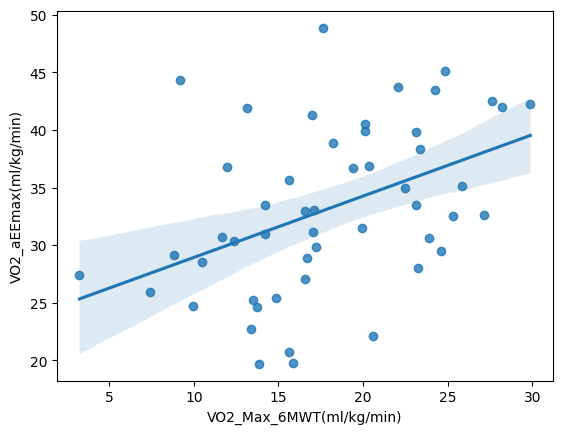

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Sample data
x_data = dataset["VO2_Max_6MWT(ml/kg/min)"]
y_data = dataset["VO2_aEEmax(ml/kg/min)"]

pred_y_df=pd.DataFrame(
    {
        "VO2_Max_6MWT(ml/kg/min)":x_data,
        "VO2_aEEmax(ml/kg/min)":y_data
    }
)


"""sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df,
    x = "Actual_Value",
    y = "Predicted_Value",
    order = 2
)"""

sns.regplot(x="VO2_Max_6MWT(ml/kg/min)", y="VO2_aEEmax(ml/kg/min)", data=pred_y_df)


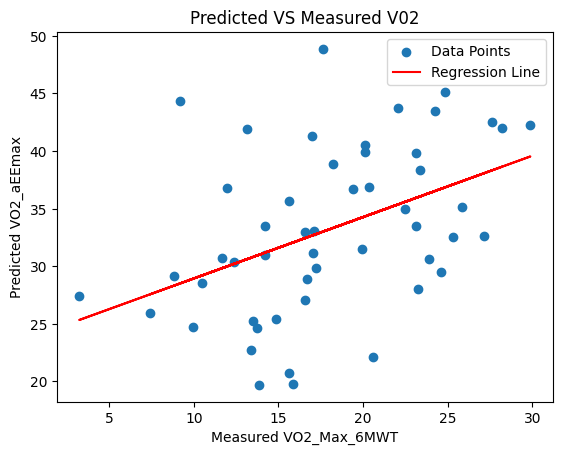

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Sample data
x_data = dataset["VO2_Max_6MWT(ml/kg/min)"]
y_data = dataset["VO2_aEEmax(ml/kg/min)"]

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regression_line = np.polyval([slope, intercept], x_data)

# Create the scatter plot with regression line
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_data, regression_line, color='r', label='Regression Line')

# Customize the plot
plt.xlabel('Measured VO2_Max_6MWT')
plt.ylabel('Predicted VO2_aEEmax')
plt.title('Predicted VS Measured V02')
plt.legend()

# Show the plot
plt.show()


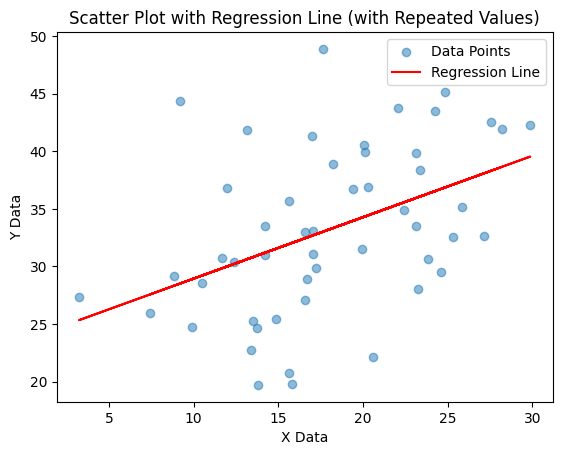

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Sample data with repeated values

x_data = dataset["VO2_Max_6MWT(ml/kg/min)"]
y_data = dataset["VO2_aEEmax(ml/kg/min)"]

# Combine x_data and y_data into a dictionary for grouping
data_dict = {}
for x, y in zip(x_data, y_data):
    if x in data_dict:
        data_dict[x].append(y)
    else:
        data_dict[x] = [y]

# Calculate means for each unique x value
unique_x = list(data_dict.keys())
mean_y = [np.mean(values) for values in data_dict.values()]

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(unique_x, mean_y)
regression_line = np.polyval([slope, intercept], unique_x)

# Create the scatter plot with regression line
plt.scatter(x_data, y_data, label='Data Points', alpha=0.5)
plt.plot(unique_x, regression_line, color='r', label='Regression Line')

# Customize the plot
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Scatter Plot with Regression Line (with Repeated Values)')
plt.legend()

# Show the plot
plt.show()


In [18]:

#last_index = dataset.columns.get_loc("VO2_aEEmax(ml/kg/min)")+1

#last_index1 = dataset.columns.get_loc("qc_date")+1


dataset = dataset.iloc[:,:]

#Custom Feature Selection

In [19]:

all_columns = list(dataset.columns)
new_keys=items_check_box(all_columns)

Checkbox(value=False, description='patient_id', indent=False)

Checkbox(value=False, description='Condition', indent=False)

Checkbox(value=False, description='HR_MAX(BPM)', indent=False)

Checkbox(value=False, description='aEE_MAX(J/min)', indent=False)

Checkbox(value=False, description='Status_aEEmax', indent=False)

Checkbox(value=False, description='slope_HR/Calories', indent=False)

Checkbox(value=False, description='Intercept_HR/Calories', indent=False)

Checkbox(value=False, description='1_min_HR_Recovery', indent=False)

Checkbox(value=False, description='2_min_HR_Recovery', indent=False)

Checkbox(value=False, description='3_min_HR_Recovery', indent=False)

Checkbox(value=False, description='4_min_HR_Recovery', indent=False)

Checkbox(value=False, description='5_min_HR_Recovery', indent=False)

Checkbox(value=False, description='VO2_Max_6MWT(ml/kg/min)', indent=False)

Checkbox(value=False, description='VO2_aEEmax(ml/kg/min)', indent=False)

Checkbox(value=False, description='nni_counter_Extreme', indent=False)

Checkbox(value=False, description='nni_counter_Heavy', indent=False)

Checkbox(value=False, description='nni_counter_Moderate', indent=False)

Checkbox(value=False, description='nni_counter_Light', indent=False)

Checkbox(value=False, description='nni_mean_Extreme', indent=False)

Checkbox(value=False, description='nni_mean_Heavy', indent=False)

Checkbox(value=False, description='nni_mean_Moderate', indent=False)

Checkbox(value=False, description='nni_mean_Light', indent=False)

Checkbox(value=False, description='nni_min_Extreme', indent=False)

Checkbox(value=False, description='nni_min_Heavy', indent=False)

Checkbox(value=False, description='nni_min_Moderate', indent=False)

Checkbox(value=False, description='nni_min_Light', indent=False)

Checkbox(value=False, description='nni_max_Extreme', indent=False)

Checkbox(value=False, description='nni_max_Heavy', indent=False)

Checkbox(value=False, description='nni_max_Moderate', indent=False)

Checkbox(value=False, description='nni_max_Light', indent=False)

Checkbox(value=False, description='hr_mean_Extreme', indent=False)

Checkbox(value=False, description='hr_mean_Heavy', indent=False)

Checkbox(value=False, description='hr_mean_Moderate', indent=False)

Checkbox(value=False, description='hr_mean_Light', indent=False)

Checkbox(value=False, description='hr_min_Extreme', indent=False)

Checkbox(value=False, description='hr_min_Heavy', indent=False)

Checkbox(value=False, description='hr_min_Moderate', indent=False)

Checkbox(value=False, description='hr_min_Light', indent=False)

Checkbox(value=False, description='hr_max_Extreme', indent=False)

Checkbox(value=False, description='hr_max_Heavy', indent=False)

Checkbox(value=False, description='hr_max_Moderate', indent=False)

Checkbox(value=False, description='hr_max_Light', indent=False)

Checkbox(value=False, description='hr_std_Extreme', indent=False)

Checkbox(value=False, description='hr_std_Heavy', indent=False)

Checkbox(value=False, description='hr_std_Moderate', indent=False)

Checkbox(value=False, description='hr_std_Light', indent=False)

Checkbox(value=False, description='nni_diff_mean_Extreme', indent=False)

Checkbox(value=False, description='nni_diff_mean_Heavy', indent=False)

Checkbox(value=False, description='nni_diff_mean_Moderate', indent=False)

Checkbox(value=False, description='nni_diff_mean_Light', indent=False)

Checkbox(value=False, description='nni_diff_min_Extreme', indent=False)

Checkbox(value=False, description='nni_diff_min_Heavy', indent=False)

Checkbox(value=False, description='nni_diff_min_Moderate', indent=False)

Checkbox(value=False, description='nni_diff_min_Light', indent=False)

Checkbox(value=False, description='nni_diff_max_Extreme', indent=False)

Checkbox(value=False, description='nni_diff_max_Heavy', indent=False)

Checkbox(value=False, description='nni_diff_max_Moderate', indent=False)

Checkbox(value=False, description='nni_diff_max_Light', indent=False)

Checkbox(value=False, description='sdnn_Extreme', indent=False)

Checkbox(value=False, description='sdnn_Heavy', indent=False)

Checkbox(value=False, description='sdnn_Moderate', indent=False)

Checkbox(value=False, description='sdnn_Light', indent=False)

Checkbox(value=False, description='sdnn_index_Extreme', indent=False)

Checkbox(value=False, description='sdnn_index_Heavy', indent=False)

Checkbox(value=False, description='sdnn_index_Moderate', indent=False)

Checkbox(value=False, description='sdnn_index_Light', indent=False)

Checkbox(value=False, description='sdann_Extreme', indent=False)

Checkbox(value=False, description='sdann_Heavy', indent=False)

Checkbox(value=False, description='sdann_Moderate', indent=False)

Checkbox(value=False, description='sdann_Light', indent=False)

Checkbox(value=False, description='rmssd_Extreme', indent=False)

Checkbox(value=False, description='rmssd_Heavy', indent=False)

Checkbox(value=False, description='rmssd_Moderate', indent=False)

Checkbox(value=False, description='rmssd_Light', indent=False)

Checkbox(value=False, description='sdsd_Extreme', indent=False)

Checkbox(value=False, description='sdsd_Heavy', indent=False)

Checkbox(value=False, description='sdsd_Moderate', indent=False)

Checkbox(value=False, description='sdsd_Light', indent=False)

Checkbox(value=False, description='nn50_Extreme', indent=False)

Checkbox(value=False, description='nn50_Heavy', indent=False)

Checkbox(value=False, description='nn50_Moderate', indent=False)

Checkbox(value=False, description='nn50_Light', indent=False)

Checkbox(value=False, description='pnn50_Extreme', indent=False)

Checkbox(value=False, description='pnn50_Heavy', indent=False)

Checkbox(value=False, description='pnn50_Moderate', indent=False)

Checkbox(value=False, description='pnn50_Light', indent=False)

Checkbox(value=False, description='nn20_Extreme', indent=False)

Checkbox(value=False, description='nn20_Heavy', indent=False)

Checkbox(value=False, description='nn20_Moderate', indent=False)

Checkbox(value=False, description='nn20_Light', indent=False)

Checkbox(value=False, description='pnn20_Extreme', indent=False)

Checkbox(value=False, description='pnn20_Heavy', indent=False)

Checkbox(value=False, description='pnn20_Moderate', indent=False)

Checkbox(value=False, description='pnn20_Light', indent=False)

Checkbox(value=False, description='tinn_n_Extreme', indent=False)

Checkbox(value=False, description='tinn_n_Heavy', indent=False)

Checkbox(value=False, description='tinn_n_Moderate', indent=False)

Checkbox(value=False, description='tinn_n_Light', indent=False)

Checkbox(value=False, description='tinn_m_Extreme', indent=False)

Checkbox(value=False, description='tinn_m_Heavy', indent=False)

Checkbox(value=False, description='tinn_m_Moderate', indent=False)

Checkbox(value=False, description='tinn_m_Light', indent=False)

Checkbox(value=False, description='tinn_Extreme', indent=False)

Checkbox(value=False, description='tinn_Heavy', indent=False)

Checkbox(value=False, description='tinn_Moderate', indent=False)

Checkbox(value=False, description='tinn_Light', indent=False)

Checkbox(value=False, description='tri_index_Extreme', indent=False)

Checkbox(value=False, description='tri_index_Heavy', indent=False)

Checkbox(value=False, description='tri_index_Moderate', indent=False)

Checkbox(value=False, description='tri_index_Light', indent=False)

Checkbox(value=False, description='fft_bands_vlf_min_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_vlf_min_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_vlf_min_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_vlf_min_Light', indent=False)

Checkbox(value=False, description='fft_bands_vlf_max_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_vlf_max_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_vlf_max_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_vlf_max_Light', indent=False)

Checkbox(value=False, description='fft_bands_lf_min_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_lf_min_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_lf_min_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_lf_min_Light', indent=False)

Checkbox(value=False, description='fft_bands_lf_max_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_lf_max_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_lf_max_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_lf_max_Light', indent=False)

Checkbox(value=False, description='fft_bands_hf_min_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_hf_min_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_hf_min_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_hf_min_Light', indent=False)

Checkbox(value=False, description='fft_bands_hf_max_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_hf_max_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_hf_max_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_hf_max_Light', indent=False)

Checkbox(value=False, description='fft_peak_low_Extreme', indent=False)

Checkbox(value=False, description='fft_peak_low_Heavy', indent=False)

Checkbox(value=False, description='fft_peak_low_Moderate', indent=False)

Checkbox(value=False, description='fft_peak_low_Light', indent=False)

Checkbox(value=False, description='fft_peak_medium_Extreme', indent=False)

Checkbox(value=False, description='fft_peak_medium_Heavy', indent=False)

Checkbox(value=False, description='fft_peak_medium_Moderate', indent=False)

Checkbox(value=False, description='fft_peak_medium_Light', indent=False)

Checkbox(value=False, description='fft_peak_high_Extreme', indent=False)

Checkbox(value=False, description='fft_peak_high_Heavy', indent=False)

Checkbox(value=False, description='fft_peak_high_Moderate', indent=False)

Checkbox(value=False, description='fft_peak_high_Light', indent=False)

Checkbox(value=False, description='fft_abs_low_Extreme', indent=False)

Checkbox(value=False, description='fft_abs_low_Heavy', indent=False)

Checkbox(value=False, description='fft_abs_low_Moderate', indent=False)

Checkbox(value=False, description='fft_abs_low_Light', indent=False)

Checkbox(value=False, description='fft_abs_medium_Extreme', indent=False)

Checkbox(value=False, description='fft_abs_medium_Heavy', indent=False)

Checkbox(value=False, description='fft_abs_medium_Moderate', indent=False)

Checkbox(value=False, description='fft_abs_medium_Light', indent=False)

Checkbox(value=False, description='fft_abs_high_Extreme', indent=False)

Checkbox(value=False, description='fft_abs_high_Heavy', indent=False)

Checkbox(value=False, description='fft_abs_high_Moderate', indent=False)

Checkbox(value=False, description='fft_abs_high_Light', indent=False)

Checkbox(value=False, description='fft_rel_low_Extreme', indent=False)

Checkbox(value=False, description='fft_rel_low_Heavy', indent=False)

Checkbox(value=False, description='fft_rel_low_Moderate', indent=False)

Checkbox(value=False, description='fft_rel_low_Light', indent=False)

Checkbox(value=False, description='fft_rel_medium_Extreme', indent=False)

Checkbox(value=False, description='fft_rel_medium_Heavy', indent=False)

Checkbox(value=False, description='fft_rel_medium_Moderate', indent=False)

Checkbox(value=False, description='fft_rel_medium_Light', indent=False)

Checkbox(value=False, description='fft_log_low_Extreme', indent=False)

Checkbox(value=False, description='fft_log_low_Heavy', indent=False)

Checkbox(value=False, description='fft_log_low_Moderate', indent=False)

Checkbox(value=False, description='fft_log_low_Light', indent=False)

Checkbox(value=False, description='fft_log_medium_Extreme', indent=False)

Checkbox(value=False, description='fft_log_medium_Heavy', indent=False)

Checkbox(value=False, description='fft_log_medium_Moderate', indent=False)

Checkbox(value=False, description='fft_log_medium_Light', indent=False)

Checkbox(value=False, description='fft_log_high_Extreme', indent=False)

Checkbox(value=False, description='fft_log_high_Heavy', indent=False)

Checkbox(value=False, description='fft_log_high_Moderate', indent=False)

Checkbox(value=False, description='fft_log_high_Light', indent=False)

Checkbox(value=False, description='fft_norm_low_Extreme', indent=False)

Checkbox(value=False, description='fft_norm_low_Heavy', indent=False)

Checkbox(value=False, description='fft_norm_low_Moderate', indent=False)

Checkbox(value=False, description='fft_norm_low_Light', indent=False)

Checkbox(value=False, description='fft_norm_high_Extreme', indent=False)

Checkbox(value=False, description='fft_norm_high_Heavy', indent=False)

Checkbox(value=False, description='fft_norm_high_Moderate', indent=False)

Checkbox(value=False, description='fft_norm_high_Light', indent=False)

Checkbox(value=False, description='fft_ratio_Extreme', indent=False)

Checkbox(value=False, description='fft_ratio_Heavy', indent=False)

Checkbox(value=False, description='fft_ratio_Moderate', indent=False)

Checkbox(value=False, description='fft_ratio_Light', indent=False)

Checkbox(value=False, description='fft_total_Extreme', indent=False)

Checkbox(value=False, description='fft_total_Heavy', indent=False)

Checkbox(value=False, description='fft_total_Moderate', indent=False)

Checkbox(value=False, description='fft_total_Light', indent=False)

Checkbox(value=False, description='fft_nfft_Extreme', indent=False)

Checkbox(value=False, description='fft_nfft_Heavy', indent=False)

Checkbox(value=False, description='fft_nfft_Moderate', indent=False)

Checkbox(value=False, description='fft_nfft_Light', indent=False)

Checkbox(value=False, description='fft_window_Extreme', indent=False)

Checkbox(value=False, description='fft_window_Heavy', indent=False)

Checkbox(value=False, description='fft_window_Moderate', indent=False)

Checkbox(value=False, description='fft_window_Light', indent=False)

Checkbox(value=False, description='fft_resampling_frequency_Extreme', indent=False)

Checkbox(value=False, description='fft_resampling_frequency_Heavy', indent=False)

Checkbox(value=False, description='fft_resampling_frequency_Moderate', indent=False)

Checkbox(value=False, description='fft_resampling_frequency_Light', indent=False)

Checkbox(value=False, description='fft_interpolation_Extreme', indent=False)

Checkbox(value=False, description='fft_interpolation_Heavy', indent=False)

Checkbox(value=False, description='fft_interpolation_Moderate', indent=False)

Checkbox(value=False, description='fft_interpolation_Light', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_min_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_min_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_min_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_min_Light', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_max_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_max_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_max_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_max_Light', indent=False)

Checkbox(value=False, description='lomb_bands_lf_min_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_lf_min_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_lf_min_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_lf_min_Light', indent=False)

Checkbox(value=False, description='lomb_bands_lf_max_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_lf_max_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_lf_max_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_lf_max_Light', indent=False)

Checkbox(value=False, description='lomb_bands_hf_min_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_hf_min_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_hf_min_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_hf_min_Light', indent=False)

Checkbox(value=False, description='lomb_bands_hf_max_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_hf_max_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_hf_max_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_hf_max_Light', indent=False)

Checkbox(value=False, description='lomb_peak_low_Extreme', indent=False)

Checkbox(value=False, description='lomb_peak_low_Heavy', indent=False)

Checkbox(value=False, description='lomb_peak_low_Moderate', indent=False)

Checkbox(value=False, description='lomb_peak_low_Light', indent=False)

Checkbox(value=False, description='lomb_peak_medium_Extreme', indent=False)

Checkbox(value=False, description='lomb_peak_medium_Heavy', indent=False)

Checkbox(value=False, description='lomb_peak_medium_Moderate', indent=False)

Checkbox(value=False, description='lomb_peak_medium_Light', indent=False)

Checkbox(value=False, description='lomb_peak_high_Extreme', indent=False)

Checkbox(value=False, description='lomb_peak_high_Heavy', indent=False)

Checkbox(value=False, description='lomb_peak_high_Moderate', indent=False)

Checkbox(value=False, description='lomb_peak_high_Light', indent=False)

Checkbox(value=False, description='lomb_abs_low_Extreme', indent=False)

Checkbox(value=False, description='lomb_abs_low_Heavy', indent=False)

Checkbox(value=False, description='lomb_abs_low_Moderate', indent=False)

Checkbox(value=False, description='lomb_abs_low_Light', indent=False)

Checkbox(value=False, description='lomb_abs_medium_Extreme', indent=False)

Checkbox(value=False, description='lomb_abs_medium_Heavy', indent=False)

Checkbox(value=False, description='lomb_abs_medium_Moderate', indent=False)

Checkbox(value=False, description='lomb_abs_medium_Light', indent=False)

Checkbox(value=False, description='lomb_abs_high_Extreme', indent=False)

Checkbox(value=False, description='lomb_abs_high_Heavy', indent=False)

Checkbox(value=False, description='lomb_abs_high_Moderate', indent=False)

Checkbox(value=False, description='lomb_abs_high_Light', indent=False)

Checkbox(value=False, description='lomb_rel_low_Extreme', indent=False)

Checkbox(value=False, description='lomb_rel_low_Heavy', indent=False)

Checkbox(value=False, description='lomb_rel_low_Moderate', indent=False)

Checkbox(value=False, description='lomb_rel_low_Light', indent=False)

Checkbox(value=False, description='lomb_rel_medium_Extreme', indent=False)

Checkbox(value=False, description='lomb_rel_medium_Heavy', indent=False)

Checkbox(value=False, description='lomb_rel_medium_Moderate', indent=False)

Checkbox(value=False, description='lomb_rel_medium_Light', indent=False)

Checkbox(value=False, description='lomb_rel_high_Extreme', indent=False)

Checkbox(value=False, description='lomb_rel_high_Heavy', indent=False)

Checkbox(value=False, description='lomb_rel_high_Moderate', indent=False)

Checkbox(value=False, description='lomb_rel_high_Light', indent=False)

Checkbox(value=False, description='lomb_log_low_Extreme', indent=False)

Checkbox(value=False, description='lomb_log_low_Heavy', indent=False)

Checkbox(value=False, description='lomb_log_low_Moderate', indent=False)

Checkbox(value=False, description='lomb_log_low_Light', indent=False)

Checkbox(value=False, description='lomb_log_medium_Extreme', indent=False)

Checkbox(value=False, description='lomb_log_medium_Heavy', indent=False)

Checkbox(value=False, description='lomb_log_medium_Moderate', indent=False)

Checkbox(value=False, description='lomb_log_medium_Light', indent=False)

Checkbox(value=False, description='lomb_log_high_Extreme', indent=False)

Checkbox(value=False, description='lomb_log_high_Heavy', indent=False)

Checkbox(value=False, description='lomb_log_high_Moderate', indent=False)

Checkbox(value=False, description='lomb_log_high_Light', indent=False)

Checkbox(value=False, description='lomb_norm_high_Extreme', indent=False)

Checkbox(value=False, description='lomb_norm_high_Heavy', indent=False)

Checkbox(value=False, description='lomb_norm_high_Moderate', indent=False)

Checkbox(value=False, description='lomb_norm_high_Light', indent=False)

Checkbox(value=False, description='lomb_norm_Low_Extreme', indent=False)

Checkbox(value=False, description='lomb_norm_Low_Heavy', indent=False)

Checkbox(value=False, description='lomb_norm_Low_Moderate', indent=False)

Checkbox(value=False, description='lomb_norm_Low_Light', indent=False)

Checkbox(value=False, description='lomb_ratio_Extreme', indent=False)

Checkbox(value=False, description='lomb_ratio_Heavy', indent=False)

Checkbox(value=False, description='lomb_ratio_Moderate', indent=False)

Checkbox(value=False, description='lomb_ratio_Light', indent=False)

Checkbox(value=False, description='lomb_total_Extreme', indent=False)

Checkbox(value=False, description='lomb_total_Heavy', indent=False)

Checkbox(value=False, description='lomb_total_Moderate', indent=False)

Checkbox(value=False, description='lomb_total_Light', indent=False)

Checkbox(value=False, description='lomb_nfft_Extreme', indent=False)

Checkbox(value=False, description='lomb_nfft_Heavy', indent=False)

Checkbox(value=False, description='lomb_nfft_Moderate', indent=False)

Checkbox(value=False, description='lomb_nfft_Light', indent=False)

Checkbox(value=False, description='lomb_ma_Extreme', indent=False)

Checkbox(value=False, description='lomb_ma_Heavy', indent=False)

Checkbox(value=False, description='lomb_ma_Moderate', indent=False)

Checkbox(value=False, description='lomb_ma_Light', indent=False)

Checkbox(value=False, description='ar_bands_vlf_min_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_vlf_min_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_vlf_min_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_vlf_min_Light', indent=False)

Checkbox(value=False, description='ar_bands_vlf_max_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_vlf_max_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_vlf_max_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_vlf_max_Light', indent=False)

Checkbox(value=False, description='ar_bands_lf_min_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_lf_min_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_lf_min_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_lf_min_Light', indent=False)

Checkbox(value=False, description='ar_bands_lf_max_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_lf_max_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_lf_max_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_lf_max_Light', indent=False)

Checkbox(value=False, description='ar_bands_hf_min_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_hf_min_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_hf_min_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_hf_min_Light', indent=False)

Checkbox(value=False, description='ar_bands_hf_max_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_hf_max_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_hf_max_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_hf_max_Light', indent=False)

Checkbox(value=False, description='ar_peak_low_Extreme', indent=False)

Checkbox(value=False, description='ar_peak_low_Heavy', indent=False)

Checkbox(value=False, description='ar_peak_low_Moderate', indent=False)

Checkbox(value=False, description='ar_peak_low_Light', indent=False)

Checkbox(value=False, description='ar_peak_medium_Extreme', indent=False)

Checkbox(value=False, description='ar_peak_medium_Heavy', indent=False)

Checkbox(value=False, description='ar_peak_medium_Moderate', indent=False)

Checkbox(value=False, description='ar_peak_medium_Light', indent=False)

Checkbox(value=False, description='ar_peak_high_Extreme', indent=False)

Checkbox(value=False, description='ar_peak_high_Heavy', indent=False)

Checkbox(value=False, description='ar_peak_high_Moderate', indent=False)

Checkbox(value=False, description='ar_peak_high_Light', indent=False)

Checkbox(value=False, description='ar_abs_low_Extreme', indent=False)

Checkbox(value=False, description='ar_abs_low_Heavy', indent=False)

Checkbox(value=False, description='ar_abs_low_Moderate', indent=False)

Checkbox(value=False, description='ar_abs_low_Light', indent=False)

Checkbox(value=False, description='ar_abs_medium_Extreme', indent=False)

Checkbox(value=False, description='ar_abs_medium_Heavy', indent=False)

Checkbox(value=False, description='ar_abs_medium_Moderate', indent=False)

Checkbox(value=False, description='ar_abs_medium_Light', indent=False)

Checkbox(value=False, description='ar_abs_high_Extreme', indent=False)

Checkbox(value=False, description='ar_abs_high_Heavy', indent=False)

Checkbox(value=False, description='ar_abs_high_Moderate', indent=False)

Checkbox(value=False, description='ar_abs_high_Light', indent=False)

Checkbox(value=False, description='ar_rel_low_Extreme', indent=False)

Checkbox(value=False, description='ar_rel_low_Heavy', indent=False)

Checkbox(value=False, description='ar_rel_low_Moderate', indent=False)

Checkbox(value=False, description='ar_rel_low_Light', indent=False)

Checkbox(value=False, description='ar_rel_medium_Extreme', indent=False)

Checkbox(value=False, description='ar_rel_medium_Heavy', indent=False)

Checkbox(value=False, description='ar_rel_medium_Moderate', indent=False)

Checkbox(value=False, description='ar_rel_medium_Light', indent=False)

Checkbox(value=False, description='ar_rel_high_Extreme', indent=False)

Checkbox(value=False, description='ar_rel_high_Heavy', indent=False)

Checkbox(value=False, description='ar_rel_high_Moderate', indent=False)

Checkbox(value=False, description='ar_rel_high_Light', indent=False)

Checkbox(value=False, description='ar_log_low_Extreme', indent=False)

Checkbox(value=False, description='ar_log_low_Heavy', indent=False)

Checkbox(value=False, description='ar_log_low_Moderate', indent=False)

Checkbox(value=False, description='ar_log_low_Light', indent=False)

Checkbox(value=False, description='ar_log_medium_Extreme', indent=False)

Checkbox(value=False, description='ar_log_medium_Heavy', indent=False)

Checkbox(value=False, description='ar_log_medium_Moderate', indent=False)

Checkbox(value=False, description='ar_log_medium_Light', indent=False)

Checkbox(value=False, description='ar_log_high_Extreme', indent=False)

Checkbox(value=False, description='ar_log_high_Heavy', indent=False)

Checkbox(value=False, description='ar_log_high_Moderate', indent=False)

Checkbox(value=False, description='ar_log_high_Light', indent=False)

Checkbox(value=False, description='ar_norm_low_Extreme', indent=False)

Checkbox(value=False, description='ar_norm_low_Heavy', indent=False)

Checkbox(value=False, description='ar_norm_low_Moderate', indent=False)

Checkbox(value=False, description='ar_norm_low_Light', indent=False)

Checkbox(value=False, description='ar_norm_high_Extreme', indent=False)

Checkbox(value=False, description='ar_norm_high_Heavy', indent=False)

Checkbox(value=False, description='ar_norm_high_Moderate', indent=False)

Checkbox(value=False, description='ar_norm_high_Light', indent=False)

Checkbox(value=False, description='ar_ratio_Extreme', indent=False)

Checkbox(value=False, description='ar_ratio_Heavy', indent=False)

Checkbox(value=False, description='ar_ratio_Moderate', indent=False)

Checkbox(value=False, description='ar_ratio_Light', indent=False)

Checkbox(value=False, description='ar_total_Extreme', indent=False)

Checkbox(value=False, description='ar_total_Heavy', indent=False)

Checkbox(value=False, description='ar_total_Moderate', indent=False)

Checkbox(value=False, description='ar_total_Light', indent=False)

Checkbox(value=False, description='ar_nfft_Extreme', indent=False)

Checkbox(value=False, description='ar_nfft_Heavy', indent=False)

Checkbox(value=False, description='ar_nfft_Moderate', indent=False)

Checkbox(value=False, description='ar_nfft_Light', indent=False)

Checkbox(value=False, description='ar_order_Extreme', indent=False)

Checkbox(value=False, description='ar_order_Heavy', indent=False)

Checkbox(value=False, description='ar_order_Moderate', indent=False)

Checkbox(value=False, description='ar_order_Light', indent=False)

Checkbox(value=False, description='ar_resampling_frequency_Extreme', indent=False)

Checkbox(value=False, description='ar_resampling_frequency_Heavy', indent=False)

Checkbox(value=False, description='ar_resampling_frequency_Moderate', indent=False)

Checkbox(value=False, description='ar_resampling_frequency_Light', indent=False)

Checkbox(value=False, description='ar_interpolation_Extreme', indent=False)

Checkbox(value=False, description='ar_interpolation_Heavy', indent=False)

Checkbox(value=False, description='ar_interpolation_Moderate', indent=False)

Checkbox(value=False, description='ar_interpolation_Light', indent=False)

Checkbox(value=False, description='sd1_Extreme', indent=False)

Checkbox(value=False, description='sd1_Heavy', indent=False)

Checkbox(value=False, description='sd1_Moderate', indent=False)

Checkbox(value=False, description='sd1_Light', indent=False)

Checkbox(value=False, description='sd2_Extreme', indent=False)

Checkbox(value=False, description='sd2_Heavy', indent=False)

Checkbox(value=False, description='sd2_Moderate', indent=False)

Checkbox(value=False, description='sd2_Light', indent=False)

Checkbox(value=False, description='sd_ratio_Extreme', indent=False)

Checkbox(value=False, description='sd_ratio_Heavy', indent=False)

Checkbox(value=False, description='sd_ratio_Moderate', indent=False)

Checkbox(value=False, description='sd_ratio_Light', indent=False)

Checkbox(value=False, description='ellipse_area_Extreme', indent=False)

Checkbox(value=False, description='ellipse_area_Heavy', indent=False)

Checkbox(value=False, description='ellipse_area_Moderate', indent=False)

Checkbox(value=False, description='ellipse_area_Light', indent=False)

Checkbox(value=False, description='sampen_Extreme', indent=False)

Checkbox(value=False, description='sampen_Heavy', indent=False)

Checkbox(value=False, description='sampen_Moderate', indent=False)

Checkbox(value=False, description='sampen_Light', indent=False)

Checkbox(value=False, description='dfa_alpha1_Extreme', indent=False)

Checkbox(value=False, description='dfa_alpha1_Heavy', indent=False)

Checkbox(value=False, description='dfa_alpha1_Moderate', indent=False)

Checkbox(value=False, description='dfa_alpha1_Light', indent=False)

Checkbox(value=False, description='dfa_alpha2_Extreme', indent=False)

Checkbox(value=False, description='dfa_alpha2_Heavy', indent=False)

Checkbox(value=False, description='dfa_alpha2_Moderate', indent=False)

Checkbox(value=False, description='dfa_alpha2_Light', indent=False)

Checkbox(value=False, description='enrollment_date', indent=False)

Checkbox(value=False, description='amts', indent=False)

Checkbox(value=False, description='amts_pass', indent=False)

Checkbox(value=False, description='ethnicity', indent=False)

Checkbox(value=False, description='race', indent=False)

Checkbox(value=False, description='smoking_status', indent=False)

Checkbox(value=False, description='smoking_history', indent=False)

Checkbox(value=False, description='alcohol_use', indent=False)

Checkbox(value=False, description='alcohol_frequency', indent=False)

Checkbox(value=False, description='substance_use', indent=False)

Checkbox(value=False, description='substance1', indent=False)

Checkbox(value=False, description='substance1_frequency', indent=False)

Checkbox(value=False, description='substance2', indent=False)

Checkbox(value=False, description='substance2_frequency', indent=False)

Checkbox(value=False, description='substance3', indent=False)

Checkbox(value=False, description='substance3_frequency', indent=False)

Checkbox(value=False, description='marital_status', indent=False)

Checkbox(value=False, description='marital_status_other', indent=False)

Checkbox(value=False, description='home_oxygen', indent=False)

Checkbox(value=False, description='dyspnea', indent=False)

Checkbox(value=False, description='age_years', indent=False)

Checkbox(value=False, description='age_months', indent=False)

Checkbox(value=False, description='atrial_fibrillation', indent=False)

Checkbox(value=False, description='arthritis', indent=False)

Checkbox(value=False, description='pad', indent=False)

Checkbox(value=False, description='cad', indent=False)

Checkbox(value=False, description='stroke', indent=False)

Checkbox(value=False, description='steroid', indent=False)

Checkbox(value=False, description='opiod', indent=False)

Checkbox(value=False, description='bleedingdisorders', indent=False)

Checkbox(value=False, description='anxiety', indent=False)

Checkbox(value=False, description='bipolar_mood_disorder', indent=False)

Checkbox(value=False, description='pacemaker', indent=False)

Checkbox(value=False, description='betablockers', indent=False)

Checkbox(value=False, description='betablockers_time', indent=False)

Checkbox(value=False, description='betablockers_type', indent=False)

Checkbox(value=False, description='mcv', indent=False)

Checkbox(value=False, description='mcv_date', indent=False)

Checkbox(value=False, description='hemoglobin', indent=False)

Checkbox(value=False, description='hemoglobin_date', indent=False)

Checkbox(value=False, description='creatinine', indent=False)

Checkbox(value=False, description='creatinine_date', indent=False)

Checkbox(value=False, description='albumin', indent=False)

Checkbox(value=False, description='albumin_date', indent=False)

Checkbox(value=False, description='platelet', indent=False)

Checkbox(value=False, description='platelet_date', indent=False)

Checkbox(value=False, description='echo_year', indent=False)

Checkbox(value=False, description='lvef', indent=False)

Checkbox(value=False, description='lvedd', indent=False)

Checkbox(value=False, description='haqdi_dg_total_pre', indent=False)

Checkbox(value=False, description='haqdi_arising_total_pre', indent=False)

Checkbox(value=False, description='haqdi_eating_total_pre', indent=False)

Checkbox(value=False, description='haqdi_walking_total_pre', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___1', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___2', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___3', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___4', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___5', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___6', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___7', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___8', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_oth_pre', indent=False)

Checkbox(value=False, description='haqdi_help1_pre___1', indent=False)

Checkbox(value=False, description='haqdi_help1_pre___2', indent=False)

Checkbox(value=False, description='haqdi_help1_pre___3', indent=False)

Checkbox(value=False, description='haqdi_help1_pre___4', indent=False)

Checkbox(value=False, description='haqdi_hygiene_total_pre', indent=False)

Checkbox(value=False, description='haqdi_reach_total_pre', indent=False)

Checkbox(value=False, description='haqdi_grip_total_pre', indent=False)

Checkbox(value=False, description='haqdi_activity_total_pre', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___1', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___2', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___3', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___4', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___5', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___6', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___7', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices2_other_pre', indent=False)

Checkbox(value=False, description='haqdi_help2_pre___1', indent=False)

Checkbox(value=False, description='haqdi_help2_pre___2', indent=False)

Checkbox(value=False, description='haqdi_help2_pre___3', indent=False)

Checkbox(value=False, description='haqdi_help2_pre___4', indent=False)

Checkbox(value=False, description='haqdi_total_pre', indent=False)

Checkbox(value=False, description='haqdi_value_fraction', indent=False)

Checkbox(value=False, description='dasi_yes_total_pre', indent=False)

Checkbox(value=False, description='dasi_vo2_peak_pre', indent=False)

Checkbox(value=False, description='dasi_mets_pre', indent=False)

Checkbox(value=False, description='gds_pre', indent=False)

Checkbox(value=False, description='depression_pre', indent=False)

Checkbox(value=False, description='cci', indent=False)

Checkbox(value=False, description='cci_date', indent=False)

Checkbox(value=False, description='cpt_code_1', indent=False)

Checkbox(value=False, description='cpt_code_2', indent=False)

Checkbox(value=False, description='cpt_code_3', indent=False)

Checkbox(value=False, description='anesthetic_type', indent=False)

Checkbox(value=False, description='operative_time', indent=False)

Checkbox(value=False, description='asa_score', indent=False)

Checkbox(value=False, description='functional_capacity', indent=False)

Checkbox(value=False, description='cam_baseline_time', indent=False)

Checkbox(value=False, description='cam_baseline_delirium', indent=False)

Checkbox(value=False, description='cam_baseline_features___1', indent=False)

Checkbox(value=False, description='cam_baseline_features___2', indent=False)

Checkbox(value=False, description='cam_baseline_features___3', indent=False)

Checkbox(value=False, description='cam_baseline_features___4', indent=False)

Checkbox(value=False, description='height', indent=False)

Checkbox(value=False, description='weight', indent=False)

Checkbox(value=False, description='bmi', indent=False)

Checkbox(value=False, description='gender', indent=False)

Checkbox(value=False, description='ffi_wtloss10', indent=False)

Checkbox(value=False, description='ffi_wtloss5', indent=False)

Checkbox(value=False, description='ffi_shrinking', indent=False)

Checkbox(value=False, description='ffi_ee', indent=False)

Checkbox(value=False, description='ffi_low_physical', indent=False)

Checkbox(value=False, description='ffi_hand_dominance', indent=False)

Checkbox(value=False, description='ffi_handgrip_strength_left', indent=False)

Checkbox(value=False, description='ffi_handgrip_strength_right', indent=False)

Checkbox(value=False, description='ffi_weakness_frailty', indent=False)

Checkbox(value=False, description='ffi_walking_time', indent=False)

Checkbox(value=False, description='ffi_walking_frailty', indent=False)

Checkbox(value=False, description='ffi_frailty_score', indent=False)

Checkbox(value=False, description='ffi_overall_frailty', indent=False)

Checkbox(value=False, description='baseline_vitals_sbp', indent=False)

Checkbox(value=False, description='baseline_vitals_dbp', indent=False)

Checkbox(value=False, description='baseline_vitals_hr', indent=False)

Checkbox(value=False, description='baseline_vitals_spo2', indent=False)

Checkbox(value=False, description='baseline_borg', indent=False)

Checkbox(value=False, description='baseline_hr2', indent=False)

Checkbox(value=False, description='baseline_spo2', indent=False)

Checkbox(value=False, description='postwalk_borg', indent=False)

Checkbox(value=False, description='postwalk_hr', indent=False)

Checkbox(value=False, description='postwalk_spo2', indent=False)

Checkbox(value=False, description='mwt_distance', indent=False)

Checkbox(value=False, description='mwt_break', indent=False)

Checkbox(value=False, description='mwt_endearly', indent=False)

Checkbox(value=False, description='mwt_time', indent=False)

Checkbox(value=False, description='proc_start', indent=False)

Checkbox(value=False, description='proc_finish', indent=False)

Checkbox(value=False, description='anesthesia_start', indent=False)

Checkbox(value=False, description='anesthesia_finish', indent=False)

Checkbox(value=False, description='proc_time', indent=False)

Checkbox(value=False, description='ebl', indent=False)

Checkbox(value=False, description='st_ii_baseline_value', indent=False)

Checkbox(value=False, description='st_ii_baseline_sbp', indent=False)

Checkbox(value=False, description='st_ii_baseline_dbp', indent=False)

Checkbox(value=False, description='st_ii_baseline_map', indent=False)

Checkbox(value=False, description='st_ii_baseline_hr', indent=False)

Checkbox(value=False, description='st_ii_min_value', indent=False)

Checkbox(value=False, description='st_ii_min_sbp', indent=False)

Checkbox(value=False, description='st_ii_min_dbp', indent=False)

Checkbox(value=False, description='st_ii_min_map', indent=False)

Checkbox(value=False, description='st_ii_min_hr', indent=False)

Checkbox(value=False, description='st_ii_max_value', indent=False)

Checkbox(value=False, description='st_ii_max_sbp', indent=False)

Checkbox(value=False, description='st_ii_max_dbp', indent=False)

Checkbox(value=False, description='st_ii_max_map', indent=False)

Checkbox(value=False, description='st_ii_max_hr', indent=False)

Checkbox(value=False, description='st_v_bseline_value', indent=False)

Checkbox(value=False, description='st_v_baseline_sbp', indent=False)

Checkbox(value=False, description='st_v_baseline_dbp', indent=False)

Checkbox(value=False, description='st_v_baseline_map', indent=False)

Checkbox(value=False, description='st_v_baseline_hr', indent=False)

Checkbox(value=False, description='st_v_min_value', indent=False)

Checkbox(value=False, description='st_v_min_sbp', indent=False)

Checkbox(value=False, description='st_v_min_dbp', indent=False)

Checkbox(value=False, description='st_v_min_map', indent=False)

Checkbox(value=False, description='st_v_min_hr', indent=False)

Checkbox(value=False, description='st_v_max_value', indent=False)

Checkbox(value=False, description='st_v_max_sbp', indent=False)

Checkbox(value=False, description='st_v_max_dbp', indent=False)

Checkbox(value=False, description='st_v_max_map', indent=False)

Checkbox(value=False, description='st_v_max_hr', indent=False)

Checkbox(value=False, description='postopcam_date_day1', indent=False)

Checkbox(value=False, description='postopcam_time_day1_am', indent=False)

Checkbox(value=False, description='postopcam_delirium_day1_am', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_am___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_am___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_am___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_am___4', indent=False)

Checkbox(value=False, description='postopcam_time_day1_pm', indent=False)

Checkbox(value=False, description='postopcam_delirium_day1_pm', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_pm___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_pm___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_pm___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_pm___4', indent=False)

Checkbox(value=False, description='postopcam_date_day2', indent=False)

Checkbox(value=False, description='postopcam_time_day2_am', indent=False)

Checkbox(value=False, description='postopcam_delirium_day2_am', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day2_am___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day2_am___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day2_am___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day2_am___4', indent=False)

Checkbox(value=False, description='postopcam_time_day2_pm', indent=False)

Checkbox(value=False, description='postopcam_delirium_day2_pm', indent=False)

Checkbox(value=False, description='postop_cam_ftrs_day2_pm___1', indent=False)

Checkbox(value=False, description='postop_cam_ftrs_day2_pm___2', indent=False)

Checkbox(value=False, description='postop_cam_ftrs_day2_pm___3', indent=False)

Checkbox(value=False, description='postop_cam_ftrs_day2_pm___4', indent=False)

Checkbox(value=False, description='postopcam_date_day3', indent=False)

Checkbox(value=False, description='postopcam_time_day3_am', indent=False)

Checkbox(value=False, description='postopcam_delirium_day3_am', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_am___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_am___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_am___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_am___4', indent=False)

Checkbox(value=False, description='postopcam_time_day3_pm', indent=False)

Checkbox(value=False, description='postopcam_delirium_day3_pm', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_pm___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_pm___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_pm___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_pm___4', indent=False)

Checkbox(value=False, description='postopcam_date_day4', indent=False)

Checkbox(value=False, description='postopcam_time_day4_am', indent=False)

Checkbox(value=False, description='postopcam_delirium_day4_am', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_am___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_am___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_am___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_am___4', indent=False)

Checkbox(value=False, description='postopcam_time_day4_pm', indent=False)

Checkbox(value=False, description='postopcam_delirium_day4_pm', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_pm___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_pm___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_pm___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_pm___4', indent=False)

Checkbox(value=False, description='postopcam_date_day5', indent=False)

Checkbox(value=False, description='postopcam_time_day5_am', indent=False)

Checkbox(value=False, description='postopcam_delirium_day5_am', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_am___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_am___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_am___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_am___4', indent=False)

Checkbox(value=False, description='postopcam_time_day5_pm', indent=False)

Checkbox(value=False, description='postopcam_delirium_day5_pm', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_pm___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_pm___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_pm___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_pm___4', indent=False)

Checkbox(value=False, description='poms_date', indent=False)

Checkbox(value=False, description='poms_evaluation_time', indent=False)

Checkbox(value=False, description='poms_pulmonary', indent=False)

Checkbox(value=False, description='poms_pulmonary_cd', indent=False)

Checkbox(value=False, description='poms_infectious', indent=False)

Checkbox(value=False, description='poms_infectious_cd', indent=False)

Checkbox(value=False, description='poms_renal', indent=False)

Checkbox(value=False, description='poms_renal_cd', indent=False)

Checkbox(value=False, description='poms_gastrointestinal', indent=False)

Checkbox(value=False, description='poms_gastrointestinal_cd', indent=False)

Checkbox(value=False, description='poms_cardiovascular', indent=False)

Checkbox(value=False, description='poms_cardiovascular_cd', indent=False)

Checkbox(value=False, description='poms_neurological', indent=False)

Checkbox(value=False, description='poms_neurological_cd', indent=False)

Checkbox(value=False, description='poms_wound', indent=False)

Checkbox(value=False, description='poms_wound_cd', indent=False)

Checkbox(value=False, description='poms_hematological', indent=False)

Checkbox(value=False, description='poms_hematological_cd', indent=False)

Checkbox(value=False, description='poms_pain', indent=False)

Checkbox(value=False, description='poms_pain_cd', indent=False)

Checkbox(value=False, description='dischargecam_date', indent=False)

Checkbox(value=False, description='dischargecam_time', indent=False)

Checkbox(value=False, description='dischargecam_delirium', indent=False)

Checkbox(value=False, description='dischargecam_ftrs___1', indent=False)

Checkbox(value=False, description='dischargecam_ftrs___2', indent=False)

Checkbox(value=False, description='dischargecam_ftrs___3', indent=False)

Checkbox(value=False, description='dischargecam_ftrs___4', indent=False)

Checkbox(value=False, description='date_of_discharge', indent=False)

Checkbox(value=False, description='los', indent=False)

Checkbox(value=False, description='postop_destination', indent=False)

Checkbox(value=False, description='haqdi_dgtotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_arisingtotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_eatingtotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_walkingtotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___1', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___2', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___3', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___4', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___5', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___6', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___7', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___8', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices_other2_30d', indent=False)

Checkbox(value=False, description='haqdi_help3_30d___1', indent=False)

Checkbox(value=False, description='haqdi_help3_30d___2', indent=False)

Checkbox(value=False, description='haqdi_help3_30d___3', indent=False)

Checkbox(value=False, description='haqdi_help3_30d___4', indent=False)

Checkbox(value=False, description='haqdi_hygienetotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_reachtotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_griptotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_activitytotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___1', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___2', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___3', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___4', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___5', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___6', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___7', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_other_30d', indent=False)

Checkbox(value=False, description='haqdi_help4_30d___1', indent=False)

Checkbox(value=False, description='haqdi_help4_30d___2', indent=False)

Checkbox(value=False, description='haqdi_help4_30d___3', indent=False)

Checkbox(value=False, description='haqdi_help4_30d___4', indent=False)

Checkbox(value=False, description='haqdi_total_30d', indent=False)

Checkbox(value=False, description='haqdi_fraction_30d', indent=False)

Checkbox(value=False, description='dasi_yes_total_30d', indent=False)

Checkbox(value=False, description='dasi_vo2_peak_30d', indent=False)

Checkbox(value=False, description='dasi_mets_30day', indent=False)

Checkbox(value=False, description='gds_30d', indent=False)

Checkbox(value=False, description='depression_30d', indent=False)

Checkbox(value=False, description='read_30d', indent=False)

Checkbox(value=False, description='read_30d_icd10', indent=False)

Checkbox(value=False, description='poms_date_30d', indent=False)

Checkbox(value=False, description='poms_time_30d', indent=False)

Checkbox(value=False, description='poms_pulmonary_30d', indent=False)

Checkbox(value=False, description='poms_pulmonary_30d_cd', indent=False)

Checkbox(value=False, description='poms_infectious_30d', indent=False)

Checkbox(value=False, description='poms_infectious_30d_cd', indent=False)

Checkbox(value=False, description='poms_renal_30d', indent=False)

Checkbox(value=False, description='poms_renal_30d_cd', indent=False)

Checkbox(value=False, description='poms_gastrointestinal_30d', indent=False)

Checkbox(value=False, description='poms_gastrointestinal_30d_cd', indent=False)

Checkbox(value=False, description='poms_cardiovascular_30d', indent=False)

Checkbox(value=False, description='poms_cardiovascular_30d_cd', indent=False)

Checkbox(value=False, description='poms_neurological_30d', indent=False)

Checkbox(value=False, description='poms_neurological_30d_cd', indent=False)

Checkbox(value=False, description='poms_wound_30d', indent=False)

Checkbox(value=False, description='poms_wound_30d_cd', indent=False)

Checkbox(value=False, description='poms_hematological_30d', indent=False)

Checkbox(value=False, description='poms_hematological_30d_cd', indent=False)

Checkbox(value=False, description='poms_pain_30d', indent=False)

Checkbox(value=False, description='poms_pain_30d_cd', indent=False)

Checkbox(value=False, description='case_report_form_complete', indent=False)

Checkbox(value=False, description='qc_yesno', indent=False)

Checkbox(value=False, description='qc_date', indent=False)

Checkbox(value=False, description='quality_check_complete', indent=False)

In [ ]:
new_features = []
for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    new_features.append(all_columns[i])

In [ ]:
dataset = dataset.loc[:,new_features]

# ***Preprocessing ***

**<font color='coral'>Null Dropping</font>**

In [ ]:
dataset = dataset.dropna(axis=1,how='all') #column elemination
dataset = dataset.reset_index(drop=True)

In [ ]:
dataset.shape

(51, 15)

**<font color='coral'>Check Null data count per column</font>**

In [ ]:
null_cols = dataset.columns[dataset.isnull().any()].tolist()

for i in null_cols:
  print(i,":",dataset[i].isna().sum().sum())
print('Total null: ',dataset.isna().sum().sum())

mwt_distance : 1
Total null:  1


**<font color='coral'>Filtering: <font color='blue'>Replacing null with mean if possible. (condition on `Patient_Id, Condition, Activity`)</font>**

In [ ]:
null_cols = dataset.columns[dataset.isnull().any()].tolist()

for current_col in null_cols:

  print(current_col)
  null_index = list(np.where(dataset[current_col].isna())[0])

  sub_con_act = []



  for i in null_index:
    if (dataset["patient_id"][i],dataset["Condition"][i]) not in sub_con_act:
      sub_con_act.append((dataset["patient_id"][i],dataset["Condition"][i]))


  for j in sub_con_act:
    temp_df = dataset.query("Condition == '"+j[1]+"' and patient_id == '"+j[0]+"'")

    #calculating mean
    temp_mean = temp_df[current_col].mean()

    for i in list(temp_df.index):
      if str(dataset[current_col][i]) == 'nan':
        dataset[current_col][i] = temp_mean


Output hidden; open in https://colab.research.google.com to view.

**<font color='coral'>Check Null data count per column after replacing</font>**

In [ ]:
null_cols = dataset.columns[dataset.isnull().any()].tolist()

for i in null_cols:
  print(i,":",dataset[i].isna().sum().sum())
print('Total null: ',dataset.isna().sum().sum())

mwt_distance : 1
Total null:  1


**removing rest of the null value**

In [ ]:
dataset.dropna(axis=0, how='any', inplace = True) #row elemination
dataset = dataset.reset_index(drop=True)

In [ ]:
dataset.shape

(50, 15)

In [ ]:
dataset = encode(dataset)

#Sliting X & y

In [ ]:
y_i = widgets.RadioButtons(
    options=new_features,
    description='Select Y:',
    disabled=False
)
y_i

RadioButtons(description='Select Y:', options=('patient_id', 'Condition', 'HR_MAX(BPM)', 'aEE_MAX(J/min)', '1_…

In [ ]:
X = dataset.loc[:, dataset.columns!=y_i.value]
X = X.drop(['patient_id', 'Condition'], axis=1)

y = dataset[y_i.value]


fn=X.columns
cn=list(set(y))

dataset['mwt_distance'].value_counts()

1365.0    3
1560.0    2
1495.0    2
1169.0    1
1462.0    1
1085.0    1
1415.0    1
1430.0    1
1080.0    1
1255.0    1
1575.0    1
1545.0    1
679.0     1
1527.5    1
1635.0    1
1820.0    1
1380.0    1
1005.0    1
1348.0    1
1222.0    1
1185.0    1
1456.0    1
1215.0    1
925.0     1
1877.0    1
1708.0    1
1446.0    1
1416.0    1
1197.0    1
1771.0    1
1477.0    1
707.0     1
1442.0    1
1608.0    1
1536.0    1
1779.0    1
1707.0    1
1540.0    1
1312.0    1
770.0     1
1625.0    1
1754.0    1
1755.0    1
1570.0    1
1500.0    1
1398.0    1
Name: mwt_distance, dtype: int64

In [ ]:
X_train = X
y_train = y

In [ ]:
dataset.head(20)

patient_id  Condition  HR_MAX(BPM)  aEE_MAX(J/min)  1_min_HR_Recovery  \
0            0          0          149           68.22           3.894737   
1            1          0          137           63.81           6.425926   
2            2          0          130           34.42           3.269231   
3            3          0          165           51.24           3.779661   
4            4          0          179           83.00           4.246377   
5            5          0          168           48.37           6.060000   
6            6          0          142           26.59           3.578947   
7            7          0          153           69.03           3.967949   
8            8          0          169           66.73           5.027778   
9            9          0          152           51.28           4.258065   
10          10          0          124           41.60           3.769231   
11          11          0          175           66.97           4.405405   
12          12          0          164           65.43           4.697674   
13          13          0          176           63.65           4.594595   
14          14          0          134           39.16           6.212766   
15          15          0          162           61.02           3.925000   
16          16          0          167           68.38           5.905660   
17          17          0          172           59.56           5.795918   
18          18          0          180           63.83           5.243243   
19          19          0          168           55.07           5.301370   

    2_min_HR_Recovery  3_min_HR_Recovery  4_min_HR_Recovery  \
0           10.751880          13.789474          16.701754   
1           18.185185          22.981481          25.227273   
2            9.153846          13.923077          14.300000   
3            9.033898          12.644068          17.928571   
4           10.594203          15.724638          22.400000   
5           15.880000          22.200000          30.318182   
6            9.438596          13.578947          18.789474   
7           10.096154          13.628205          16.000000   
8           18.638889          24.000000          34.384615   
9           12.709677          18.161290          25.153846   
10          10.205128          16.051282          22.625000   
11          13.324324          21.432432          33.117647   
12          11.651163          16.860465          19.277778   
13          13.027027          17.000000          24.227273   
14          16.574468          21.382979          23.500000   
15          13.475000          20.050000          24.500000   
16          14.754717          20.792453          26.300000   
17          15.653061          20.183673          24.631579   
18          15.702703          25.000000          36.217391   
19          15.342466          21.780822          31.928571   

    5_min_HR_Recovery  VO2_aEEmax(ml/kg/min)  age_years  weight    bmi  \
0           15.500000              28.882638       64.0   117.0  36.00   
1           31.200000              32.653098       61.0    96.8  31.00   
2           17.600000              19.710869       71.0    86.5  32.20   
3           20.666667              36.838412       72.0    68.9  28.70   
4           27.666667              43.506815       72.0    94.5  25.60   
5           48.142857              31.116903       68.0    77.0  30.10   
6           20.222222              27.383204       81.0    48.1  23.50   
7           18.789474              30.639712       61.0   111.6  30.90   
8           57.666667              38.390961       68.0    86.1  28.40   
9           28.000000              29.536605       64.0    86.0  28.40   
10          20.666667              22.157532       69.0    93.0  28.59   
11          35.571429              42.259237       63.0    78.5  24.80   
12          27.666667              41.340132       78.0    78.4  28.10   
13          31.555556     



---



---





---



#Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
!pip install shap
import shap

def explain_shap(model,temp_X,max_dis=20):
  explainer = shap.Explainer(model.predict, temp_X)
  shap_values = explainer (temp_X)
  shap.plots.bar(shap_values,max_display=max_dis)

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
X_train = X
y_train = y

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


count=[]
mx_depth=[]

for i in range(2,15):
  rfr = RandomForestRegressor(max_depth=i)

  rfr.fit(X_train, y_train)
  y_pred = rfr.predict(X_train)
  r2=r2_score(y_train,y_pred)
  print("RF Training r2: ",r2,", When Max Depth:",i)
  count.append(r2)
  mx_depth.append(i)

print("RF Max R2: ",max(count)," Max Depth: ",mx_depth[count.index(max(count))])

RF Training r2:  0.5764690888830084 , When Max Depth: 2
RF Training r2:  0.7270589016303259 , When Max Depth: 3
RF Training r2:  0.8163366604864379 , When Max Depth: 4
RF Training r2:  0.8439689683160233 , When Max Depth: 5
RF Training r2:  0.8621076958361921 , When Max Depth: 6
RF Training r2:  0.875516410037134 , When Max Depth: 7
RF Training r2:  0.8675964992871676 , When Max Depth: 8
RF Training r2:  0.8784765395721503 , When Max Depth: 9
RF Training r2:  0.8727448940872986 , When Max Depth: 10
RF Training r2:  0.8808125799804571 , When Max Depth: 11
RF Training r2:  0.8673841650642824 , When Max Depth: 12
RF Training r2:  0.8711193476610657 , When Max Depth: 13
RF Training r2:  0.8549590475969959 , When Max Depth: 14
RF Max R2:  0.8808125799804571  Max Depth:  11


Testing r2:  0.8549590475969959
R_sq:  0.8549590475969959


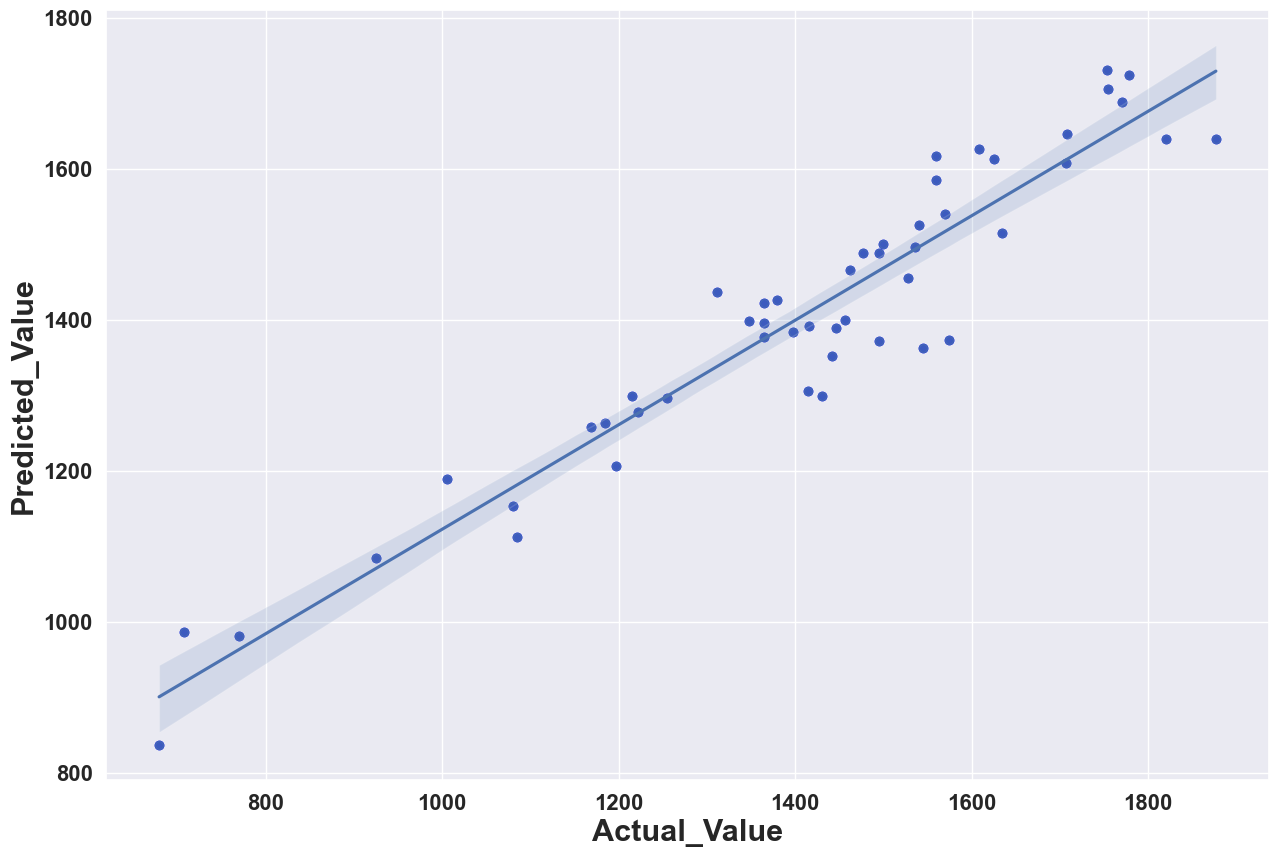

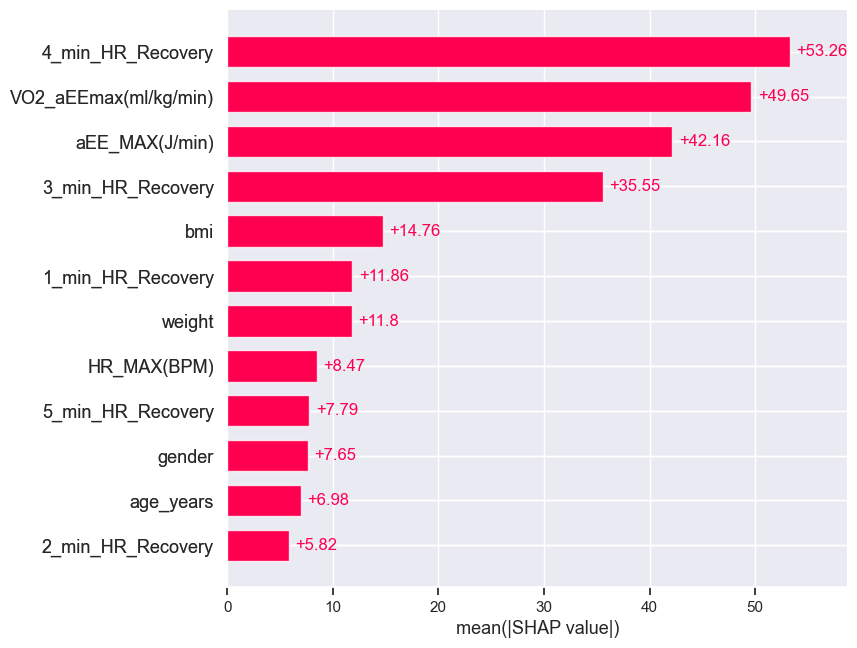

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


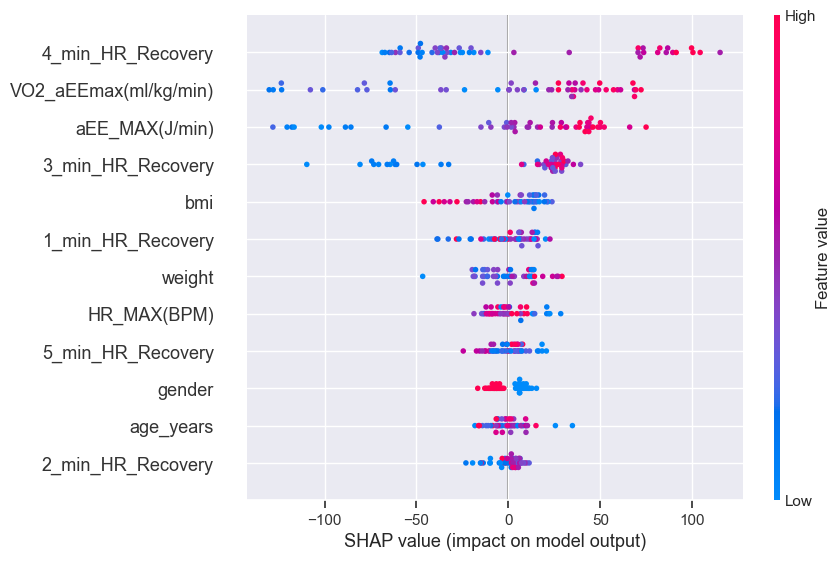

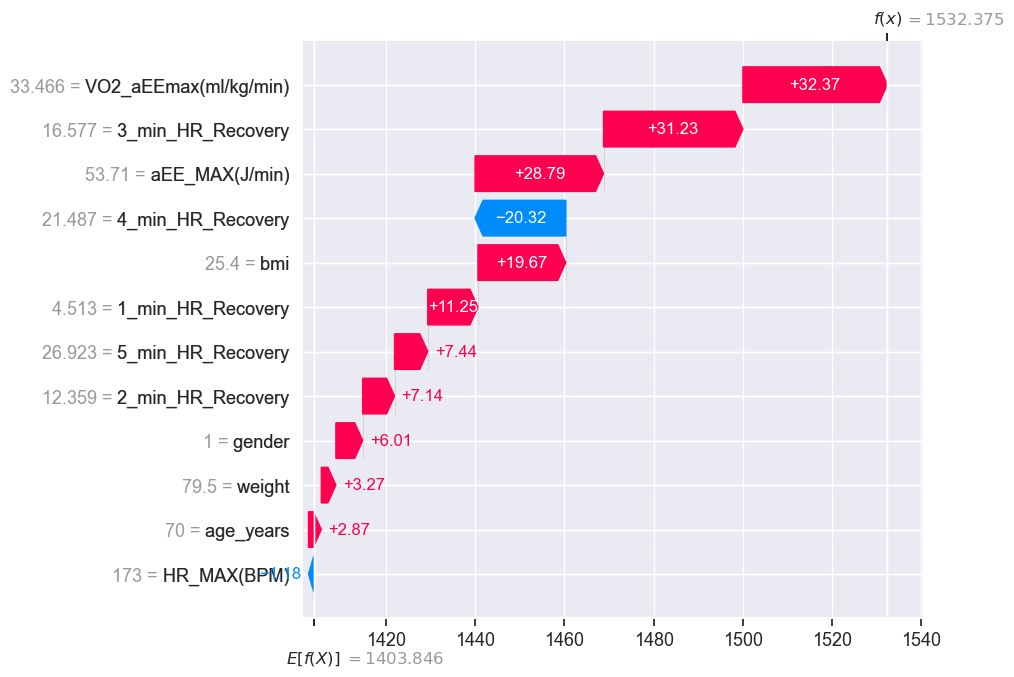

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = rfr.score(X_train, y_train)
print("R_sq: ",r_sq)


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
prim_plot(y_train,y_pred)
plt.show()

regr2 = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))])
regr2.fit(X_train, y_train)

explainer2 = shap.Explainer(regr2, X_train)
check_additivity=False
shap_values2 = explainer2 (X_train, check_additivity=check_additivity)
shap.plots.bar(shap_values2,max_display=40)
shap.plots.beeswarm(shap_values2, max_display=40)
shap.plots.waterfall(shap_values2[20], max_display=40)



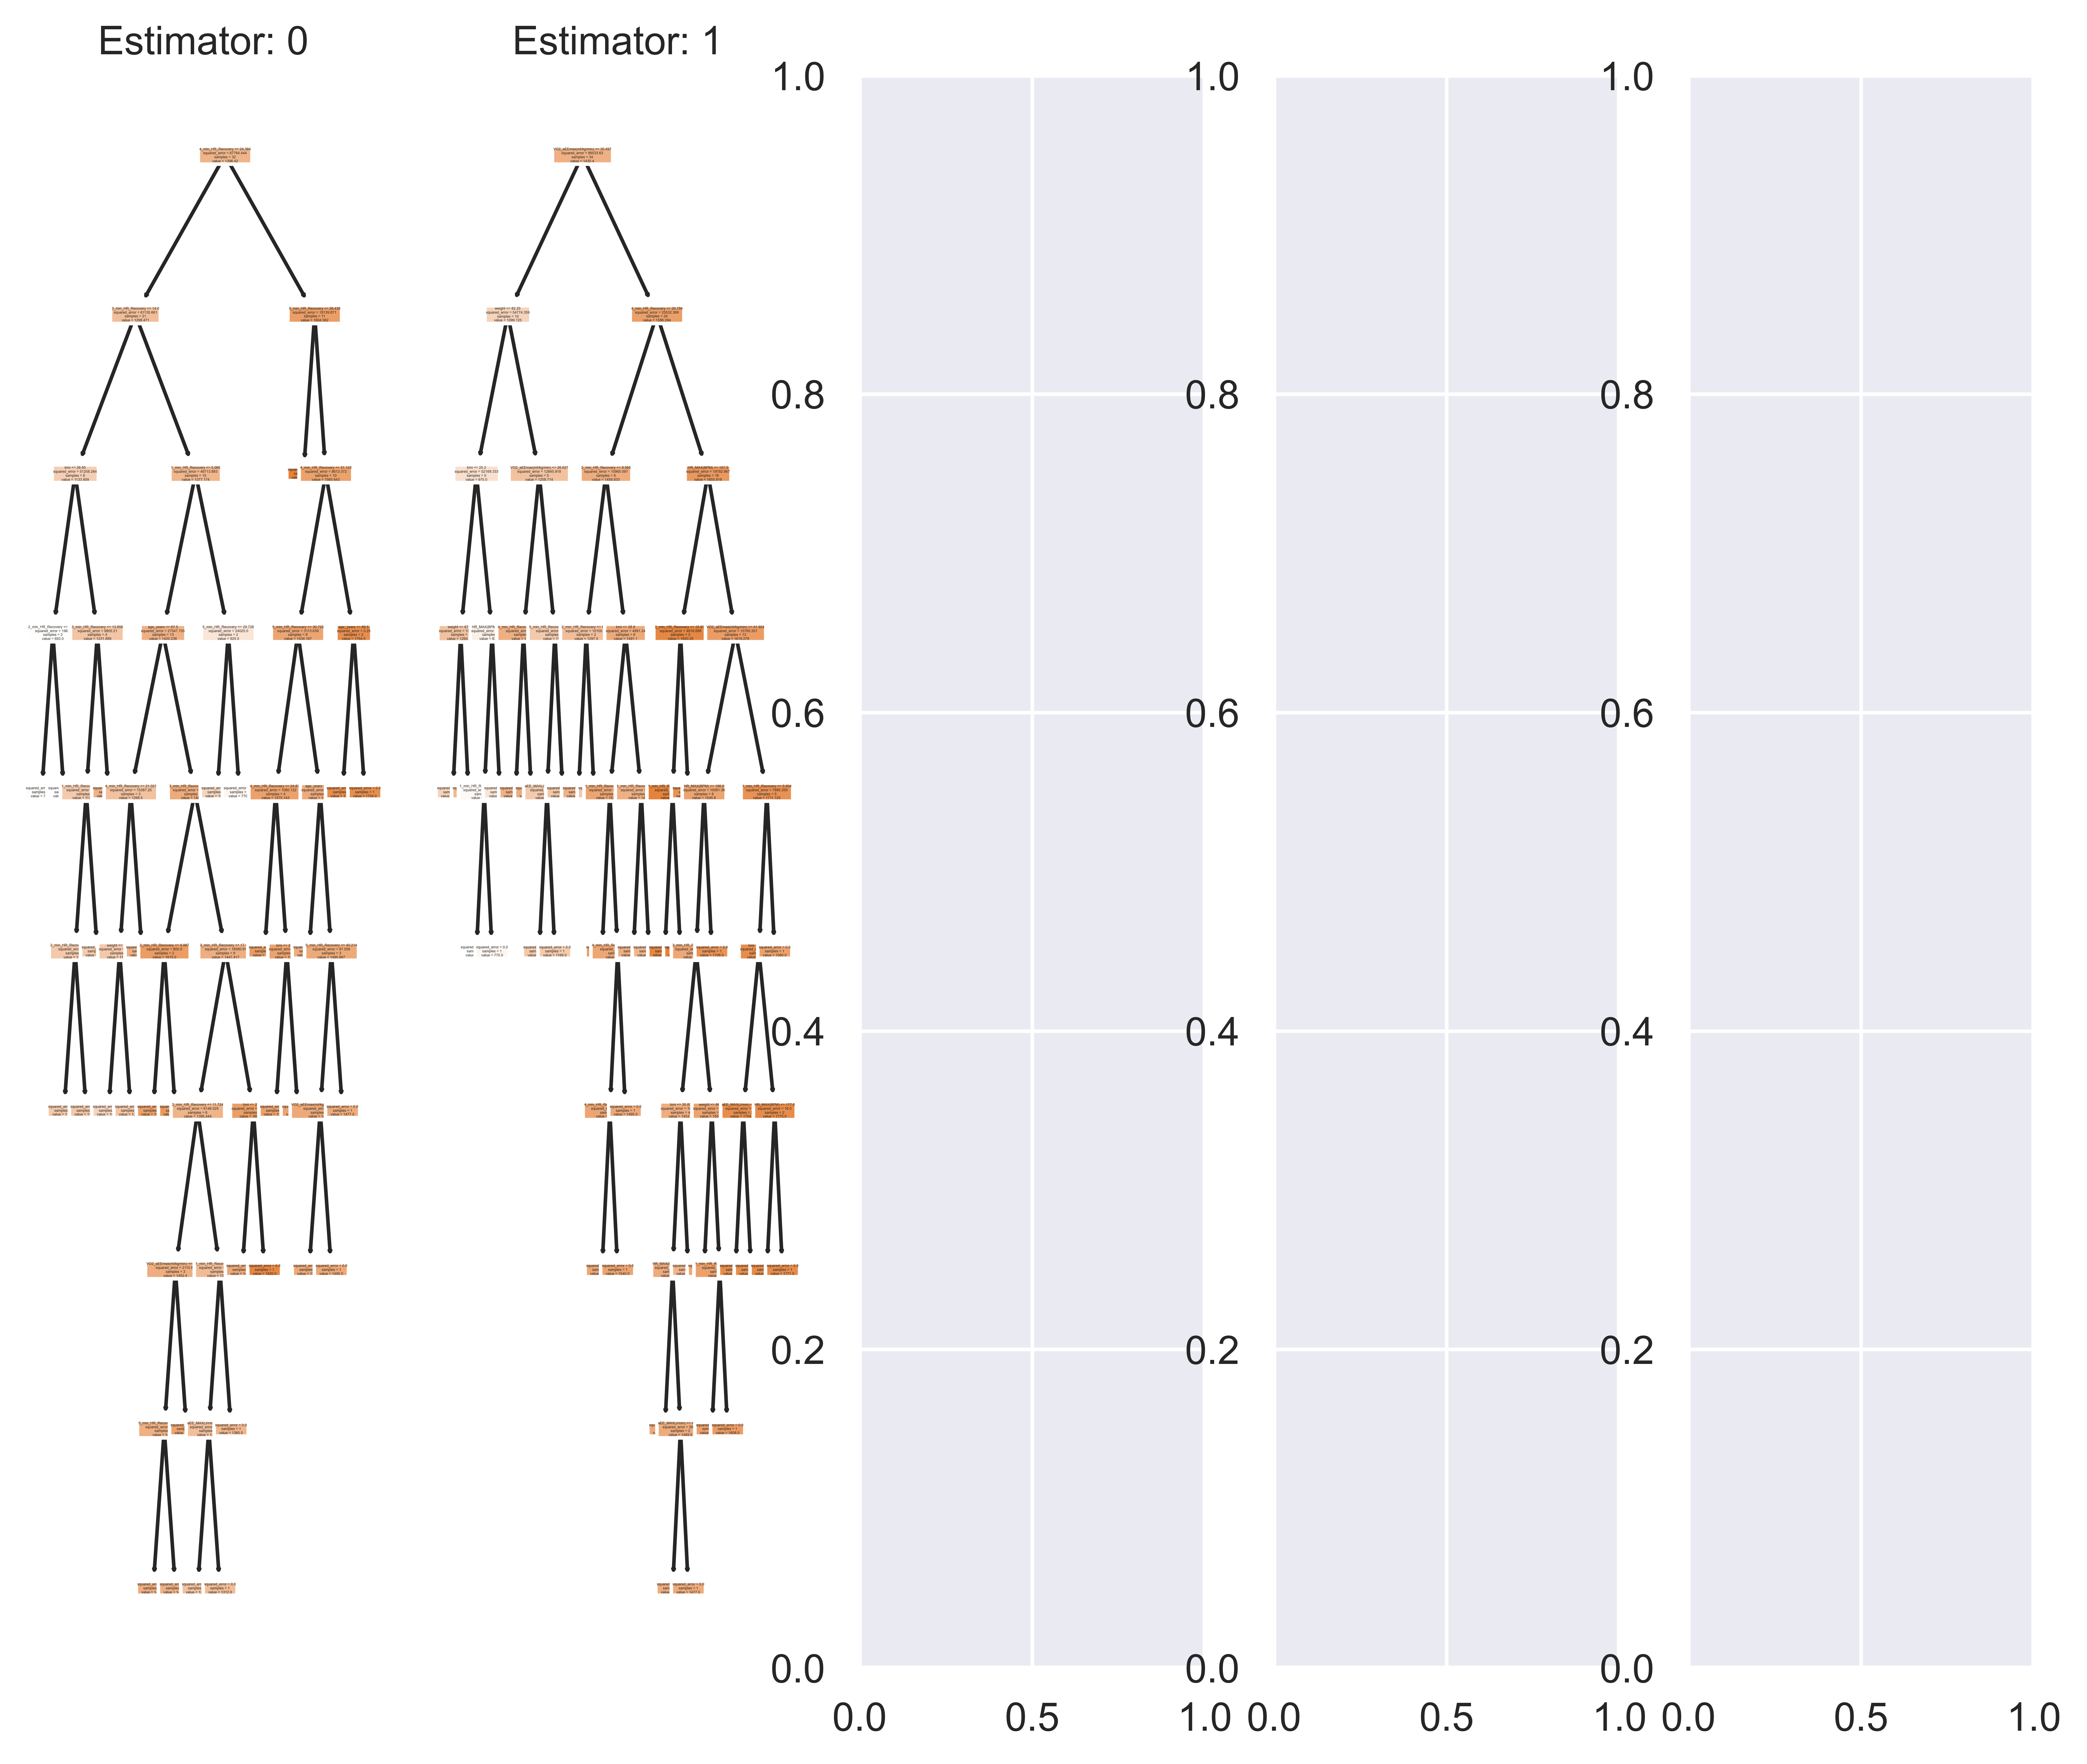

In [ ]:
viz_trees(rfr,fn,['0','1','2'],2)

In [ ]:
#pd.DataFrame(zip(X.columns, rfr.coef_))

In [ ]:
pip install pyCompare


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pyCompare.blandAltman(y_train,y_pred, limitOfAgreement=1.96, confidenceInterval=95, confidenceIntervalMethod='approximate', detrend=None, percentage=False, **kwargs)

In [ ]:
#Linear Regression

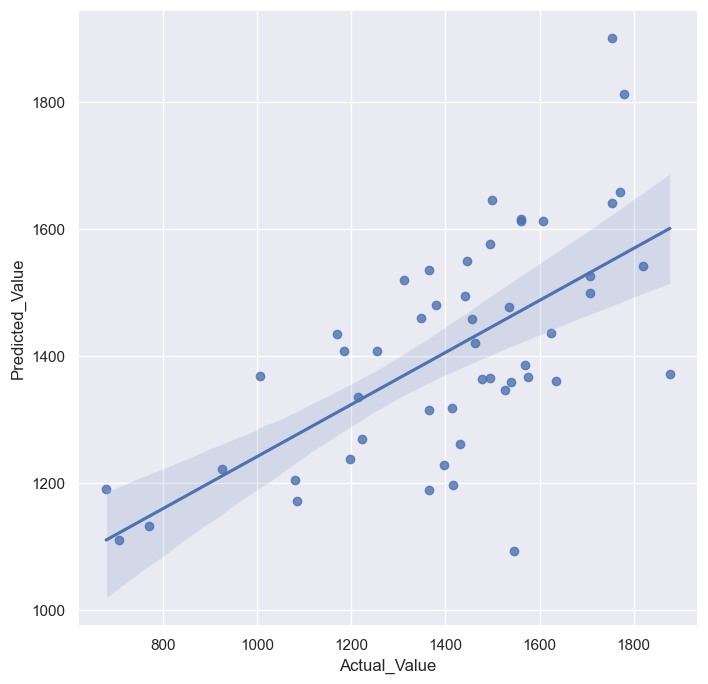

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)

prim_plot(y_train,y_pred)


In [ ]:
#Feature Coefficient

In [ ]:
pd.DataFrame(zip(X.columns, lin_reg.coef_))

0          1
0             HR_MAX(BPM)  -1.859983
1          aEE_MAX(J/min) -12.398713
2       1_min_HR_Recovery -46.915275
3       2_min_HR_Recovery -13.260403
4       3_min_HR_Recovery  24.430717
5       4_min_HR_Recovery  23.309287
6       5_min_HR_Recovery  -5.786906
7   VO2_aEEmax(ml/kg/min)  31.348581
8               age_years   1.835005
9                  weight  20.108408
10                    bmi -33.219158
11                 gender  83.900603

In [ ]:
#Model Intercept

In [ ]:
lin_reg.intercept_

-16.088974792764475

Testing r2:  0.40957738027444857
R_sq:  0.40957738027444857


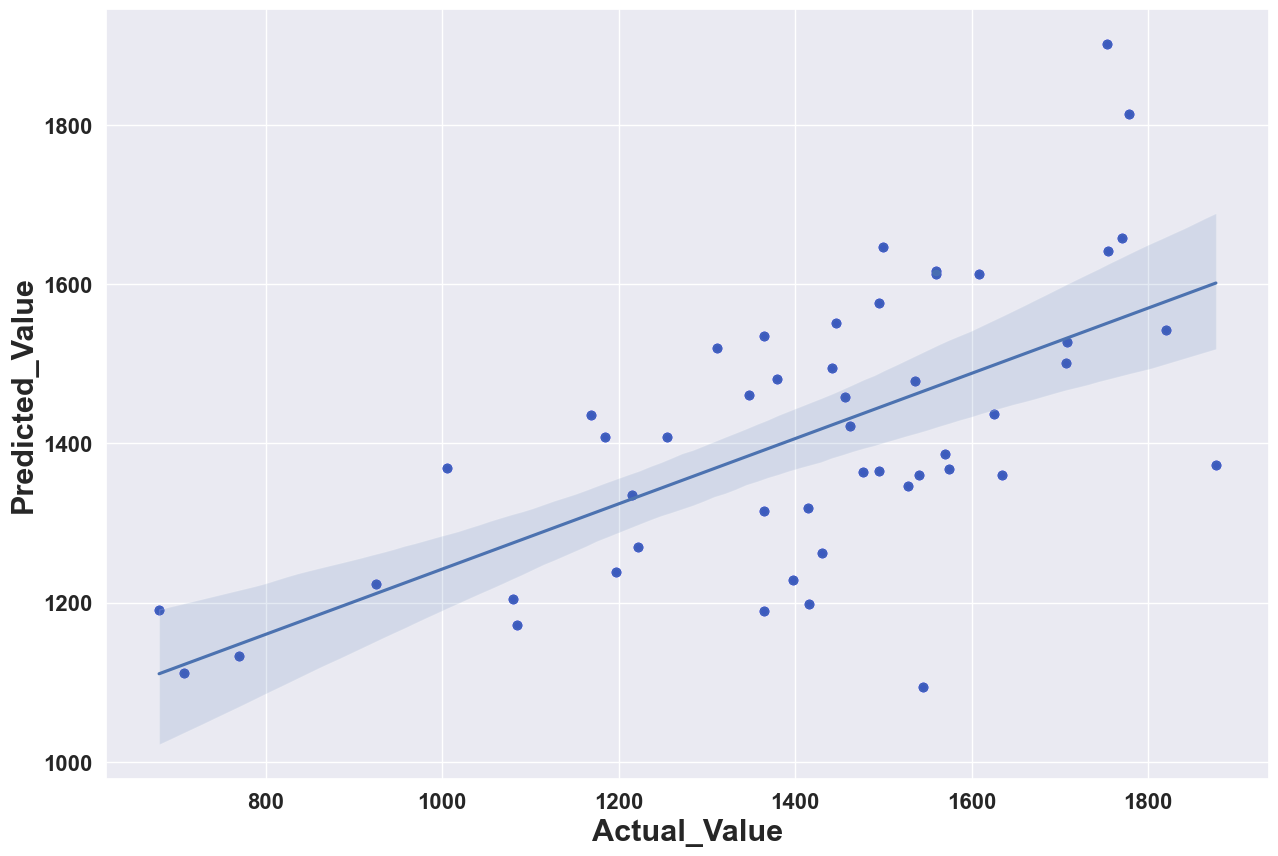

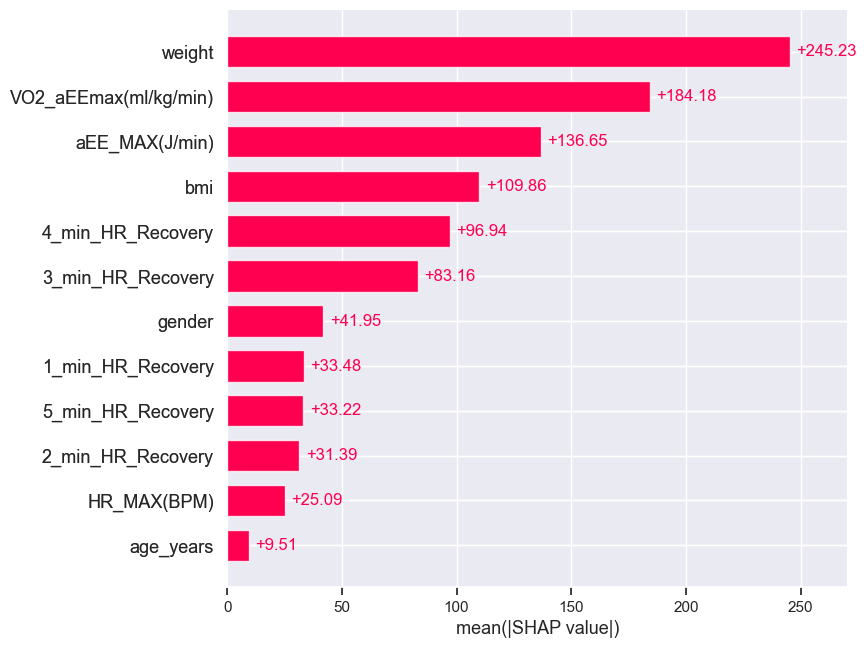

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


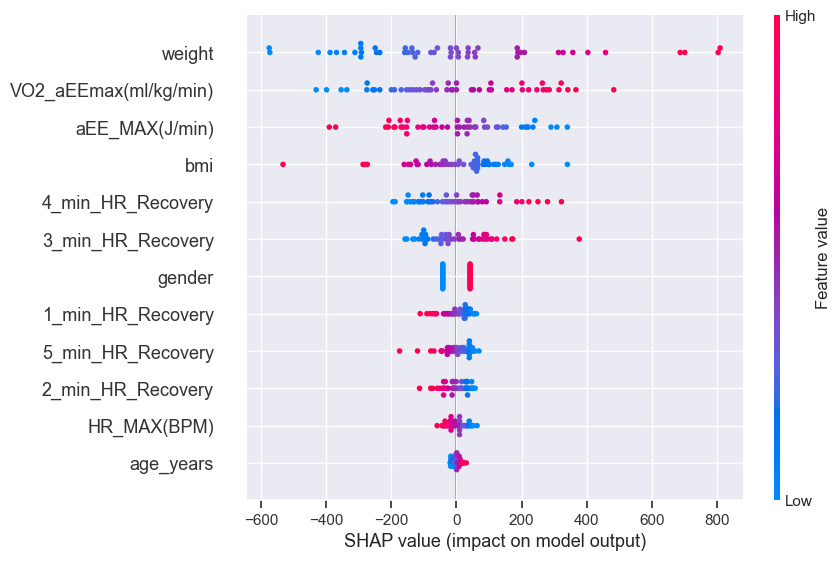

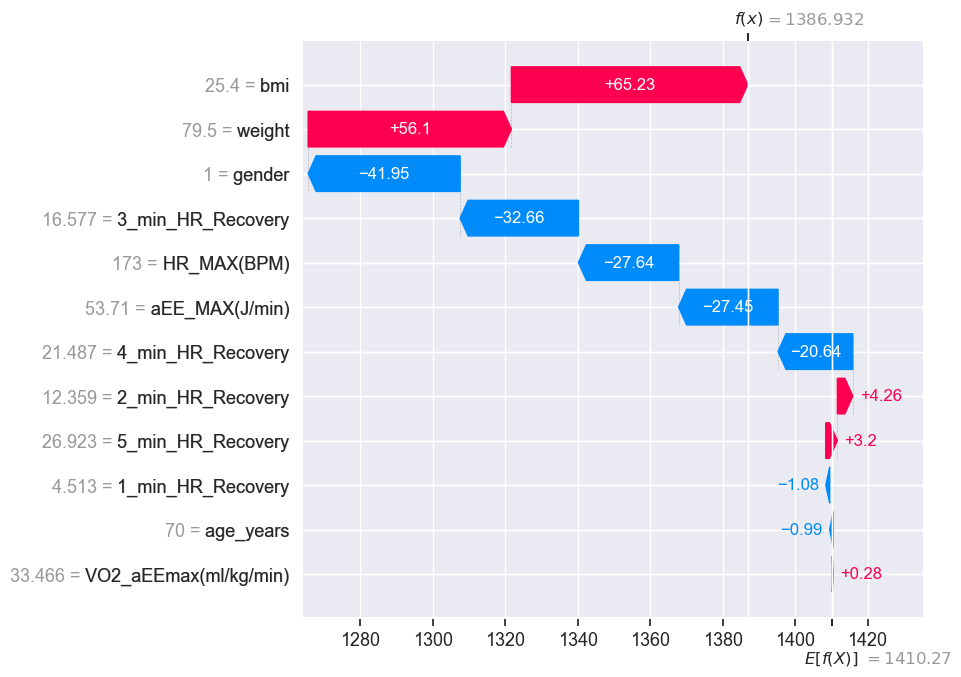

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = lin_reg.score(X_train, y_train)
print("R_sq: ",r_sq)





import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


lin_reg.fit(X_train, y_train)


explainer1 = shap.Explainer(lin_reg, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=20)
shap.plots.beeswarm(shap_values1, max_display=20)
shap.plots.waterfall(shap_values1[20], max_display=20)

#Kernel Ridge

In [ ]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)


print("Training")
y_pred= krr.predict(X_train)
res(y_train,y_pred)
'''
print("Testing")
pred_test= krr.predict(X_test)
res(y_test,pred_test)

'''

Training
Mean absolute error = 170.79
Mean squared error = 44007.61
Median absolute error = 144.75
Explain variance score = 0.41
R2 score = 0.41


'\nprint("Testing")\npred_test= krr.predict(X_test)\nres(y_test,pred_test)\n\n'

Testing r2:  0.40919054346092776
R_sq:  0.40919054346092776


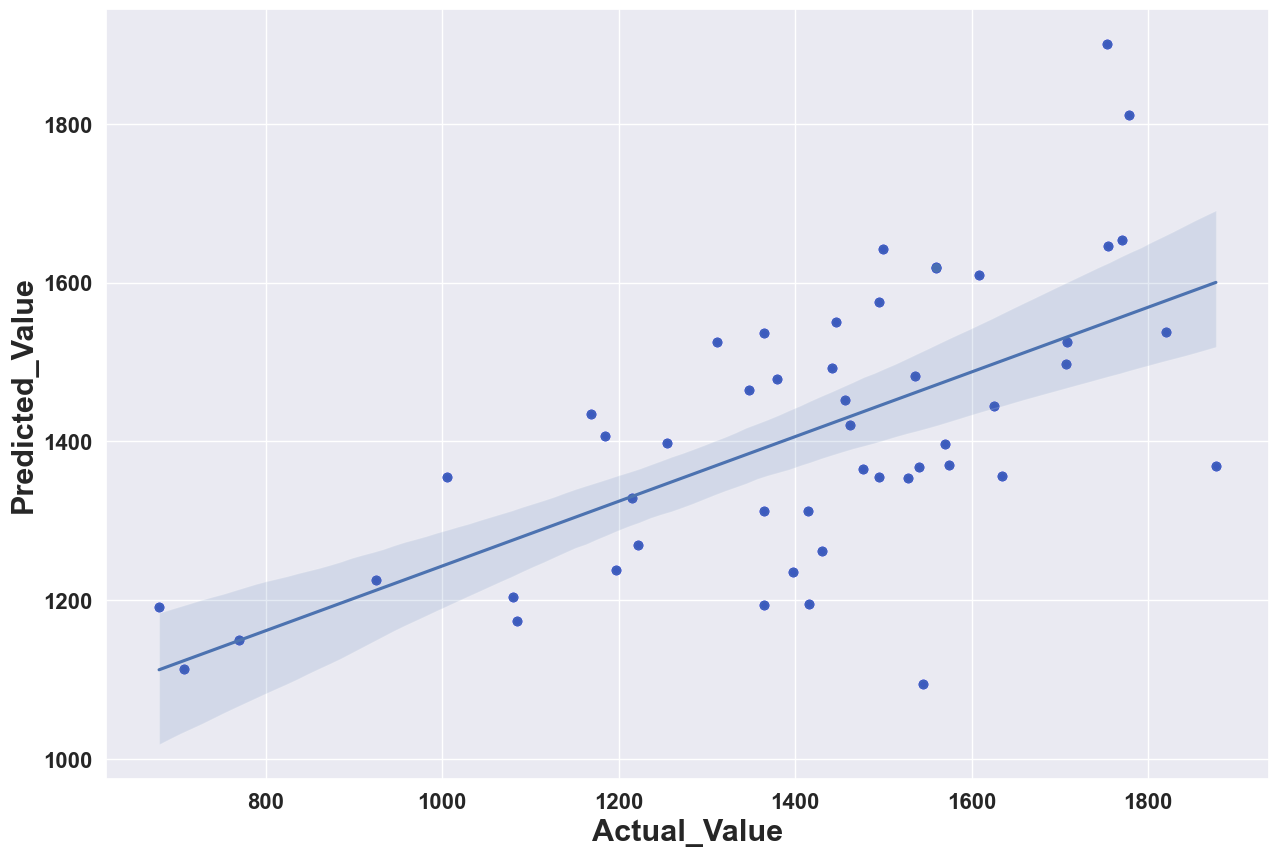

'\nexplainer1 = shap.Explainer(krr, X_train)\nshap_values1 = explainer1 (X_train)\nshap.plots.bar(shap_values1,max_display=20)\nshap.plots.beeswarm(shap_values1, max_display=20)\nshap.plots.waterfall(shap_values1[20], max_display=20)\n\n'

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = krr.score(X_train, y_train)
print("R_sq: ",r_sq)


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


krr.fit(X_train, y_train)

'''
explainer1 = shap.Explainer(krr, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=20)
shap.plots.beeswarm(shap_values1, max_display=20)
shap.plots.waterfall(shap_values1[20], max_display=20)

'''

#SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svm.fit(X_train, y_train)

print("Training")
y_pred= svm.predict(X_train)
res(y_train,y_pred)
'''
print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)
'''

Training
Mean absolute error = 201.3
Mean squared error = 75235.92
Median absolute error = 134.12
Explain variance score = 0.01
R2 score = -0.01


'\nprint("Testing")\npred_test= regr.predict(X_test)\nres(y_test,pred_test)\n'

Testing r2:  -0.01005472293962173
R_sq:  -0.01005472293962173


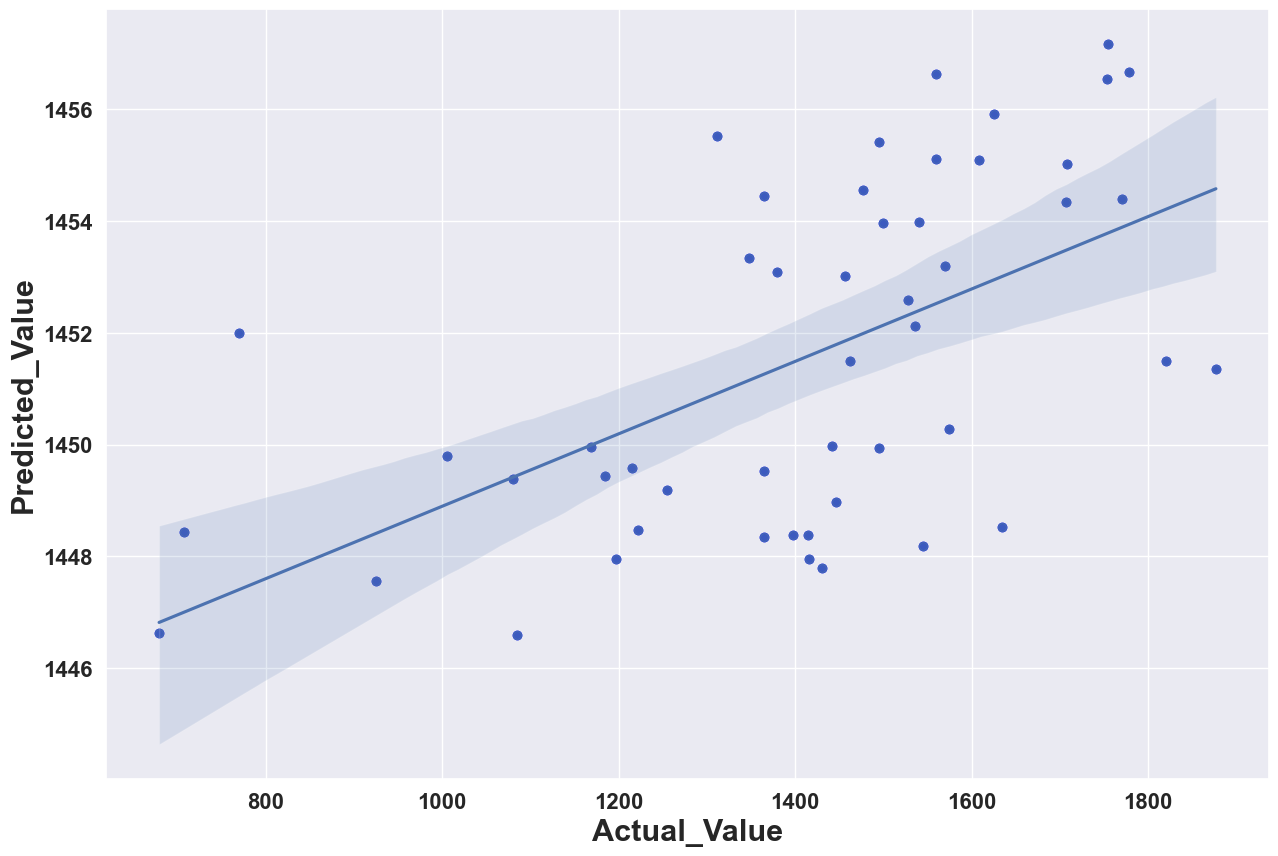

'\n\nexplainer1 = shap.Explainer(svm, X_train)\nshap_values1 = explainer1 (X_train)\nshap.plots.bar(shap_values1,max_display=20)\nshap.plots.beeswarm(shap_values1, max_display=20)\nshap.plots.waterfall(shap_values1[20], max_display=20)\n\n'

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = svm.score(X_train, y_train)
print("R_sq: ",r_sq)



import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


svm.fit(X_train, y_train)
'''

explainer1 = shap.Explainer(svm, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=20)
shap.plots.beeswarm(shap_values1, max_display=20)
shap.plots.waterfall(shap_values1[20], max_display=20)

'''


#Lasso

In [ ]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=0.1)
las.fit(X_train, y_train)

print("Training")
y_pred= las.predict(X_train)
res(y_train,y_pred)
'''
print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)
'''

Training
Mean absolute error = 171.13
Mean squared error = 43979.05
Median absolute error = 149.41
Explain variance score = 0.41
R2 score = 0.41


'\nprint("Testing")\npred_test= regr.predict(X_test)\nres(y_test,pred_test)\n'

Testing r2:  0.40957388034085496
R_sq:  0.40957388034085496


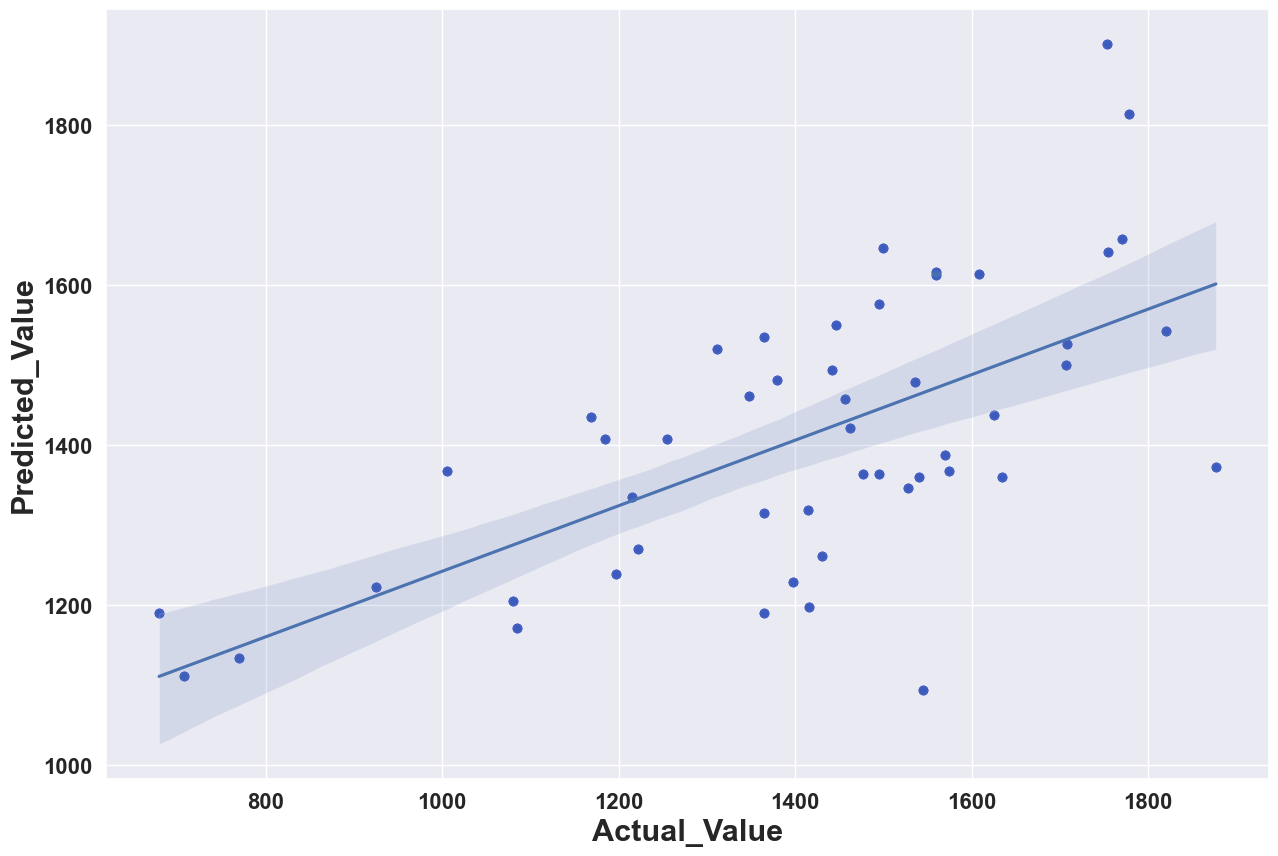

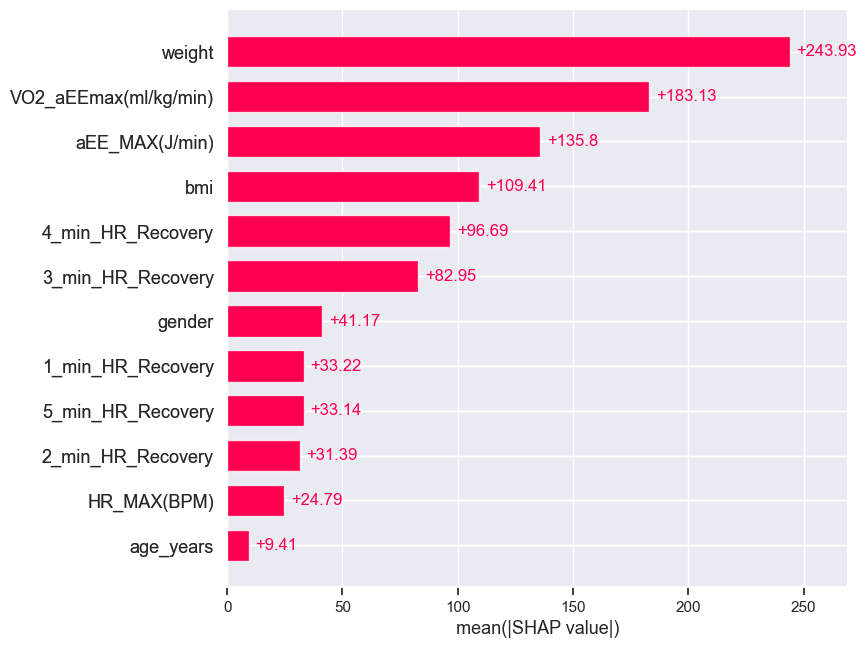

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


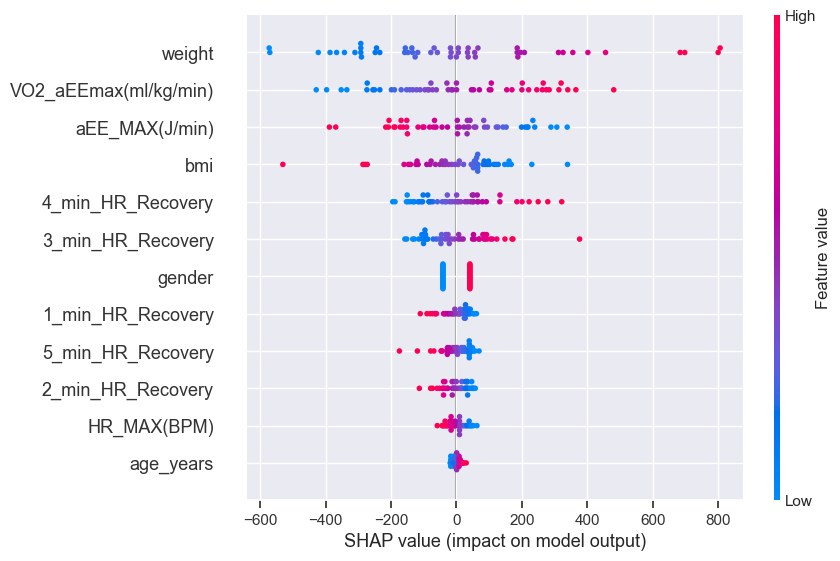

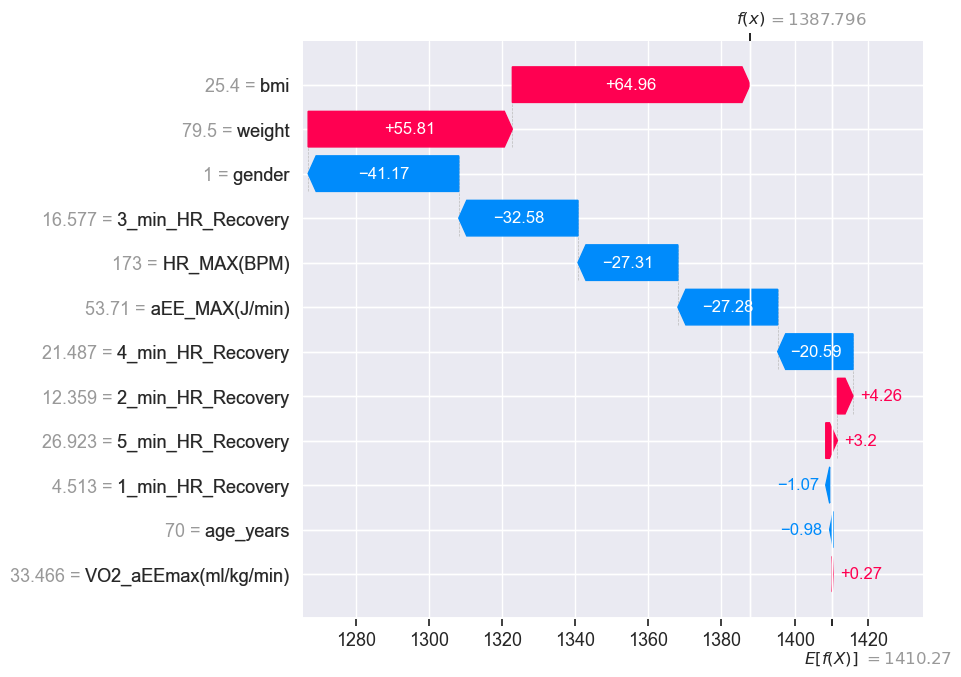

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = las.score(X_train, y_train)
print("R_sq: ",r_sq)



import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


las.fit(X_train, y_train)


explainer1 = shap.Explainer(las, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=20)
shap.plots.beeswarm(shap_values1, max_display=20)
shap.plots.waterfall(shap_values1[20], max_display=20)

